# COVID-19 DATA READER 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib  inline
style.use('seaborn-paper')
style.use('seaborn-pastel') #ggplot')
style.use('seaborn-whitegrid') #ggplot')
from datetime import date
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'legend.labelspacing':0.15})

In [41]:
MA=14 # FOR MOVING AVERAGES
def moving_average(data_set, periods=6):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

In [42]:
urlcsv='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
# Load the first sheet of the Excel file into a data frame
#df = pd.read_excel(urlxls, sheet_name=0, header=0)
df = pd.read_csv(urlcsv, encoding = "ISO-8859-1")
#df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')


# ## adaptação do formato da data
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')


countries=df['countriesAndTerritories'].unique()
geoIDS=df['geoId'].unique()

### Base de Dados Johns Hopkins Recovered
#recov='COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
## recov=' https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv'
recov='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
dfr=pd.read_csv(recov)
#dfr['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
#print(dfr[dfr['Country/Region']=='US'])

In [43]:
ptdf = df[df['geoId'] == 'PT']
ptdate='2020-03-03'
ptdf = ptdf[ptdf['dateRep'] >= ptdate]
Npt=ptdf.iloc[0,9]/100000 # População por 100 000
ptrec=dfr[dfr['Country/Region']=='Portugal'].iloc[0,4:].loc['3/2/20':]
#print(len(ptrec.values), len(ptdf['deaths'].values),len(ptdf['cases'].values))
#print(ptrec)
#print(ptdf[:5])

# # DADOS ESPANHA

# In[198]:


spdf = df[df['geoId'] == 'ES']
spdate='2020-02-25'
spdf = spdf[spdf['dateRep'] >= spdate]
Nsp = spdf.iloc[0,9]/100000 # População por 100 000
sprec=dfr[dfr['Country/Region']=='Spain'].iloc[0,4:].loc['2/24/20':]


# # DADOS ITÁLIA

# In[199]:


itdf = df[df['geoId'] == 'IT']
itdate='2020-02-22'
itdf = itdf[itdf['dateRep'] >= itdate]
Nit =  itdf.iloc[0,9]/100000 # População por 100 000
itrec=dfr[dfr['Country/Region']=='Italy'].iloc[0,4:].loc['2/21/20':]


# # DADOS FRANçA

# In[200]:


frdf = df[df['geoId'] == 'FR']
frdate='2020-02-26'
frdf = frdf[frdf['dateRep'] >= frdate]
Nfr = frdf.iloc[0,9]/100000 # População por 100 000
frrec=dfr[dfr['Country/Region']=='France'].iloc[0,4:].loc['2/25/20':]

# # Dados Suécia

# In[201]:


sedf = df[df['geoId'] == 'SE']
sedate='2020-02-27'
sedf = sedf[sedf['dateRep'] >= sedate]
Nse = sedf.iloc[0,9]/100000 # População por 100 000
serec=dfr[dfr['Country/Region']=='Sweden'].iloc[0,4:].loc['2/26/20':]


# # DADOS SUíçA

# In[202]:


chdf = df[df['geoId'] == 'CH']
chdate='2020-02-26'
chdf = chdf[chdf['dateRep'] >= chdate]
Nch = chdf.iloc[0,9]/100000 # População por 100 000
chrec=dfr[dfr['Country/Region']=='Switzerland'].iloc[0,4:].loc['2/25/20':]

# # DADOS ALEMANHA, BRASIL, UK
dedf = df[df['geoId'] == 'DE']
dedate='2020-02-26'
dedf = dedf[dedf['dateRep'] >= dedate]
Nde = dedf.iloc[0,9]/100000 # População por 100 000
derec=dfr[dfr['Country/Region']=='Germany'].iloc[0,4:].loc['2/25/20':]


ukdf = df[df['geoId'] == 'UK']
ukdate='2020-02-24'
ukdf = ukdf[ukdf['dateRep'] >= ukdate]
Nuk = ukdf.iloc[0,9]/100000 # População por 100 000
ukrec=dfr[dfr['Country/Region']=='United Kingdom'].iloc[6,4:].loc['2/23/20':]


brdf = df[df['geoId'] == 'BR']
brdate='2020-02-26'
brdf = brdf[brdf['dateRep'] >= brdate]
Nbr = brdf.iloc[0,9]/100000 # População por 100 000
brrec=dfr[dfr['Country/Region']=='Brazil'].iloc[0,4:].loc['2/25/20':]


# # DADOS United States of America
usdf = df[df['geoId'] == 'US']
usdate='2020-02-21'
usdf = usdf[usdf['dateRep'] >= usdate]
Nus = usdf.iloc[0,9]/100000 # População por 100 000
usrec=dfr[dfr['Country/Region']=='US'].iloc[0,4:].loc['2/20/20':]

# # Dados JAPAN
jpdf = df[df['geoId'] == 'JP']
jpdate='2020-02-13'
jpdf = jpdf[jpdf['dateRep'] >= jpdate]
print(jpdf['cases'])
Njp = jpdf.iloc[0,9]/100000 # População por 100 000
jprec=dfr[dfr['Country/Region']=='Japan'].iloc[0,4:].loc['2/12/20':]

# # Dados Netherlands
nldf = df[df['geoId'] == 'NL']
nldate='2020-03-07'
nldf = nldf[nldf['dateRep'] >= nldate]
Nnl = nldf.iloc[0,9]/100000 # População por 100 000
nlrec= dfr[dfr['Country/Region']=='Netherlands'].iloc[0,4:].loc['3/6/20':]# A tratar

# # Dados Belgium
bedf = df[df['geoId'] == 'BE']
bedate='2020-03-02'
bedf = bedf[bedf['dateRep'] >= bedate]
Nbe =  bedf.iloc[0,9]/100000 # População por 100 000
berec= dfr[dfr['Country/Region']=='Belgium'].iloc[0,4:].loc['3/1/20':]# A tratar

# # Dados Russia
rudf = df[df['geoId'] == 'RU']
rudate='2020-03-03'
rudf = rudf[rudf['dateRep'] >= rudate]
Nru =  rudf.iloc[0,9]/100000 # População por 100 000
rurec= dfr[dfr['Country/Region']=='Russia'].iloc[0,4:].loc['3/2/20':]# A tratar


# # Dados Greece
eldf = df[df['geoId'] == 'EL']
eldate='2020-02-27'
eldf = eldf[eldf['dateRep'] >= eldate]
Nel =  eldf.iloc[0,9]/100000 # População por 100 000
elrec= dfr[dfr['Country/Region']=='Greece'].iloc[0,4:].loc['2/26/20':]# A tratar


trdf = df[df['geoId'] == 'TR']
trdate='2020-03-12'
trdf = trdf[trdf['dateRep'] >= trdate]
Ntr =  trdf.iloc[0,9]/100000 # População por 100 000
trrec= dfr[dfr['Country/Region']=='Turkey'].iloc[0,4:].loc['3/11/20':]# A tratar


czdf = df[df['geoId'] == 'CZ']
czdate='2020-03-02'
czdf = czdf[czdf['dateRep'] >= czdate]
Ncz =  czdf.iloc[0,9]/100000 # População por 100 000
czrec= dfr[dfr['Country/Region']=='Czechia'].iloc[0,4:].loc['3/1/20':]# A tratar


hudf = df[df['geoId'] == 'HU']
hudate='2020-03-05'
hudf = hudf[hudf['dateRep'] >= hudate]
Nhu =  hudf.iloc[0,9]/100000 # População por 100 000
hurec= dfr[dfr['Country/Region']=='Hungary'].iloc[0,4:].loc['3/4/20':]# A tratar

atdf = df[df['geoId'] == 'AT']
atdate='2020-02-26'
atdf = atdf[atdf['dateRep'] >= atdate]
Nat =  atdf.iloc[0,9]/100000 # População por 100 000
atrec= dfr[dfr['Country/Region']=='Austria'].iloc[0,4:].loc['2/25/20':]# A tratar

ecdf = df[df['geoId'] == 'EC']
ecdate='2020-02-29'
ecdf = ecdf[ecdf['dateRep'] >= ecdate]
Nec =  ecdf.iloc[0,9]/100000 # População por 100 000
ecrec= dfr[dfr['Country/Region']=='Ecuador'].iloc[0,4:].loc['2/28/20':]# A tratar


phdf = df[df['geoId'] == 'PH']
phdate='2020-03-03'
phdf = phdf[phdf['dateRep'] >= phdate]
Nph =  phdf.iloc[0,9]/100000 # População por 100 000
phrec= dfr[dfr['Country/Region']=='Philippines'].iloc[0,4:].loc['3/2/20':]# A tratar

# # DADOS CHINA
# In[205]:


cndf = df[df['geoId'] == 'CN']
cndate='2020-01-03'
cndf = cndf[cndf['dateRep'] >= cndate]
#Ncn =  cndf.iloc[0,9]/1000000 # aqui isto não presta....
cnrec= dfr[dfr['Country/Region']=='China'].iloc[0,4:].loc['2/1/20':]# A tratar
Ncn=1390
NcnW=11
NcnHub=59

29126    1862
29127    1969
29128    2424
29129    2442
29130    2405
         ... 
29421       7
29422      14
29423       8
29424       1
29425       4
Name: cases, Length: 300, dtype: int64


In [44]:
portugal={'country': 'Portugal', 'color':'b', 'label':'Portugal','ls': '-.','markers': '.',
          'cases':ptdf['cases'].values,'deaths':ptdf['deaths'].values,'pop':Npt,
          'recovered':ptrec.values}

spain={'country': 'Spain', 'color':'y', 'label':'Espanha', 'ls': '-','markers': '',
       'cases':spdf['cases'].values,'deaths':spdf['deaths'].values,'pop':Nsp,
       'recovered':sprec.values}

italy={'country': 'Italy', 'color':'g', 'label':'Itália','ls': '-','markers': '',
       'cases':itdf['cases'].values,'deaths':itdf['deaths'].values,'pop':Nit,
       'recovered':itrec.values}

france={'country': 'France', 'color':'r', 'label':'França','ls': '-','markers': '',
        'cases':frdf['cases'].values,'deaths':frdf['deaths'].values,'pop':Nfr,
        'recovered':frrec.values}

sweden={'country': 'Sweden', 'color':'c', 'label':'Suécia','ls': '-','markers': '',
        'cases':sedf['cases'].values,'deaths':sedf['deaths'].values,'pop':Nse,
        'recovered':serec.values}

switzerland={'country': 'Switzerland', 'color':'brown', 'label':'Suiça','ls': '-','markers': '+',
             'cases':chdf['cases'].values,'deaths':chdf['deaths'].values,'pop':Nch,
             'recovered':chrec.values}

germany={'country': 'Germany', 'color':'purple', 'label':'Alemanha','ls': '-','markers': '',
         'cases':dedf['cases'].values,'deaths':dedf['deaths'].values,'pop':Nde,
         'recovered':derec.values}

united_kingdom={'country': 'United_Kingdom', 'color':'coral', 'label':'Inglaterra','ls': '-','markers': '',
                'cases':ukdf['cases'].values,'deaths':ukdf['deaths'].values,'pop':Nuk,
                'recovered':ukrec.values}

brazil={'country': 'Brazil', 'color':'silver', 'label':'Brasil','ls': '-','markers': '',
        'cases':brdf['cases'].values,'deaths':brdf['deaths'].values,'pop':Nbr,
        'recovered':brrec.values}

usa={'country': 'United_States_of_America', 'color':'cyan', 'label':'USA','ls': (0, (1, 1)),'markers': '',
       'cases':usdf['cases'].values,'deaths':usdf['deaths'].values,'pop':Nus,
     'recovered':usrec.values}

japan={'country': 'Japan', 'color':'gold', 'label':'Japão','ls': '-.','markers': '',
       'cases':jpdf['cases'].values,'deaths':jpdf['deaths'].values,'pop':Njp,
     'recovered':jprec.values}

netherlands={'country': 'Netherlands', 'color':'rosybrown', 'label':'Holanda','ls':(0, (2, 1, 1, 1)),'markers': '',
       'cases':nldf['cases'].values,'deaths':nldf['deaths'].values,'pop':Nnl,
     'recovered':nlrec.values}

belgium={'country': 'Belgium', 'color':'fuchsia', 'label':'Bélgica','ls': (0, (3, 1, 1, 1)),'markers': '.',
         'cases':bedf['cases'].values,'deaths':bedf['deaths'].values,'pop':Nbe,
         'recovered':berec.values}

russia={'country': 'Russia', 'color':'slategray', 'label':'Rússia','ls': (0, (4, 1, 3, 7)),'markers': '',
         'cases':rudf['cases'].values,'deaths':rudf['deaths'].values,'pop':Nru,
         'recovered':rurec.values}


greece={'country': 'Greece', 'color':'peru', 'label':'Grécia','ls': (1, (1, 10, 1, 5)),'markers': '*',
         'cases':eldf['cases'].values,'deaths':eldf['deaths'].values,'pop':Nel,
         'recovered':elrec.values}

turkey={'country': 'Turkey', 'color':'rebeccapurple', 'label':'Turquia','ls': (1, (1, 3, 1, 10)),'markers': '.',
         'cases':trdf['cases'].values,'deaths':trdf['deaths'].values,'pop':Ntr,
         'recovered':trrec.values}

hungary={'country': 'Hungary', 'color':'forestgreen', 'label':'Hungria','ls': (1, (3, 3, 3, 3)),'markers': '',
         'cases':hudf['cases'].values,'deaths':hudf['deaths'].values,'pop':Nhu,
         'recovered':hurec.values}


austria={'country': 'Austria', 'color':'gainsboro', 'label':'Austria','ls': (1, (4, 1, 3, 4)),'markers': '*',
         'cases':atdf['cases'].values,'deaths':atdf['deaths'].values,'pop':Nat,
         'recovered':atrec.values}

czechia={'country': 'Czechia', 'color':'burlywood', 'label':'Req. Checa','ls': (1, (5, 1, 1, 5)),'markers': '+',
         'cases':czdf['cases'].values,'deaths':czdf['deaths'].values,'pop':Ncz,
         'recovered':czrec.values}

ecuador={'country': 'Ecuador', 'color':'brown', 'label':'Equador','ls': ':' ,'markers': '2',
         'cases':ecdf['cases'].values,'deaths':ecdf['deaths'].values,'pop':Nec,
         'recovered':ecrec.values}

philippines={'country': 'Filipinas', 'color':'k', 'label':'Filipinas','ls': '--' ,'markers': ' ',
         'cases':phdf['cases'].values,'deaths':phdf['deaths'].values,'pop':Nph,
         'recovered':phrec.values}

china={'country': 'China', 'color':'k', 'label':'China','ls': '-','markers': '',
       'cases':cndf['cases'].values,'deaths':cndf['deaths'].values,'pop':Ncn,
       'recovered':cnrec.values}

countrieslist=[portugal,
               spain,
               france,
               italy,
               switzerland,
               germany,
               united_kingdom,
               usa,
               sweden,
               japan,
               netherlands,
               belgium,
               greece,
               czechia,
               turkey,
               hungary,
               #philippines,
               austria,
               russia,
               brazil,
               china]

countrieslist0=countrieslist[:-1]

In [45]:
# Os dados estão ordenados do último para o primeiro dia.
# flip -> passa do primeiro para o último dia.

# In[207]:


for country in countrieslist0:
    country['cases']=np.flip(country['cases'])
    country['deaths']=np.flip(country['deaths'])

Text(0.5, 1.0, 'casos positivos por dia (média móvel  a 14 dias) 2020-12-08')

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


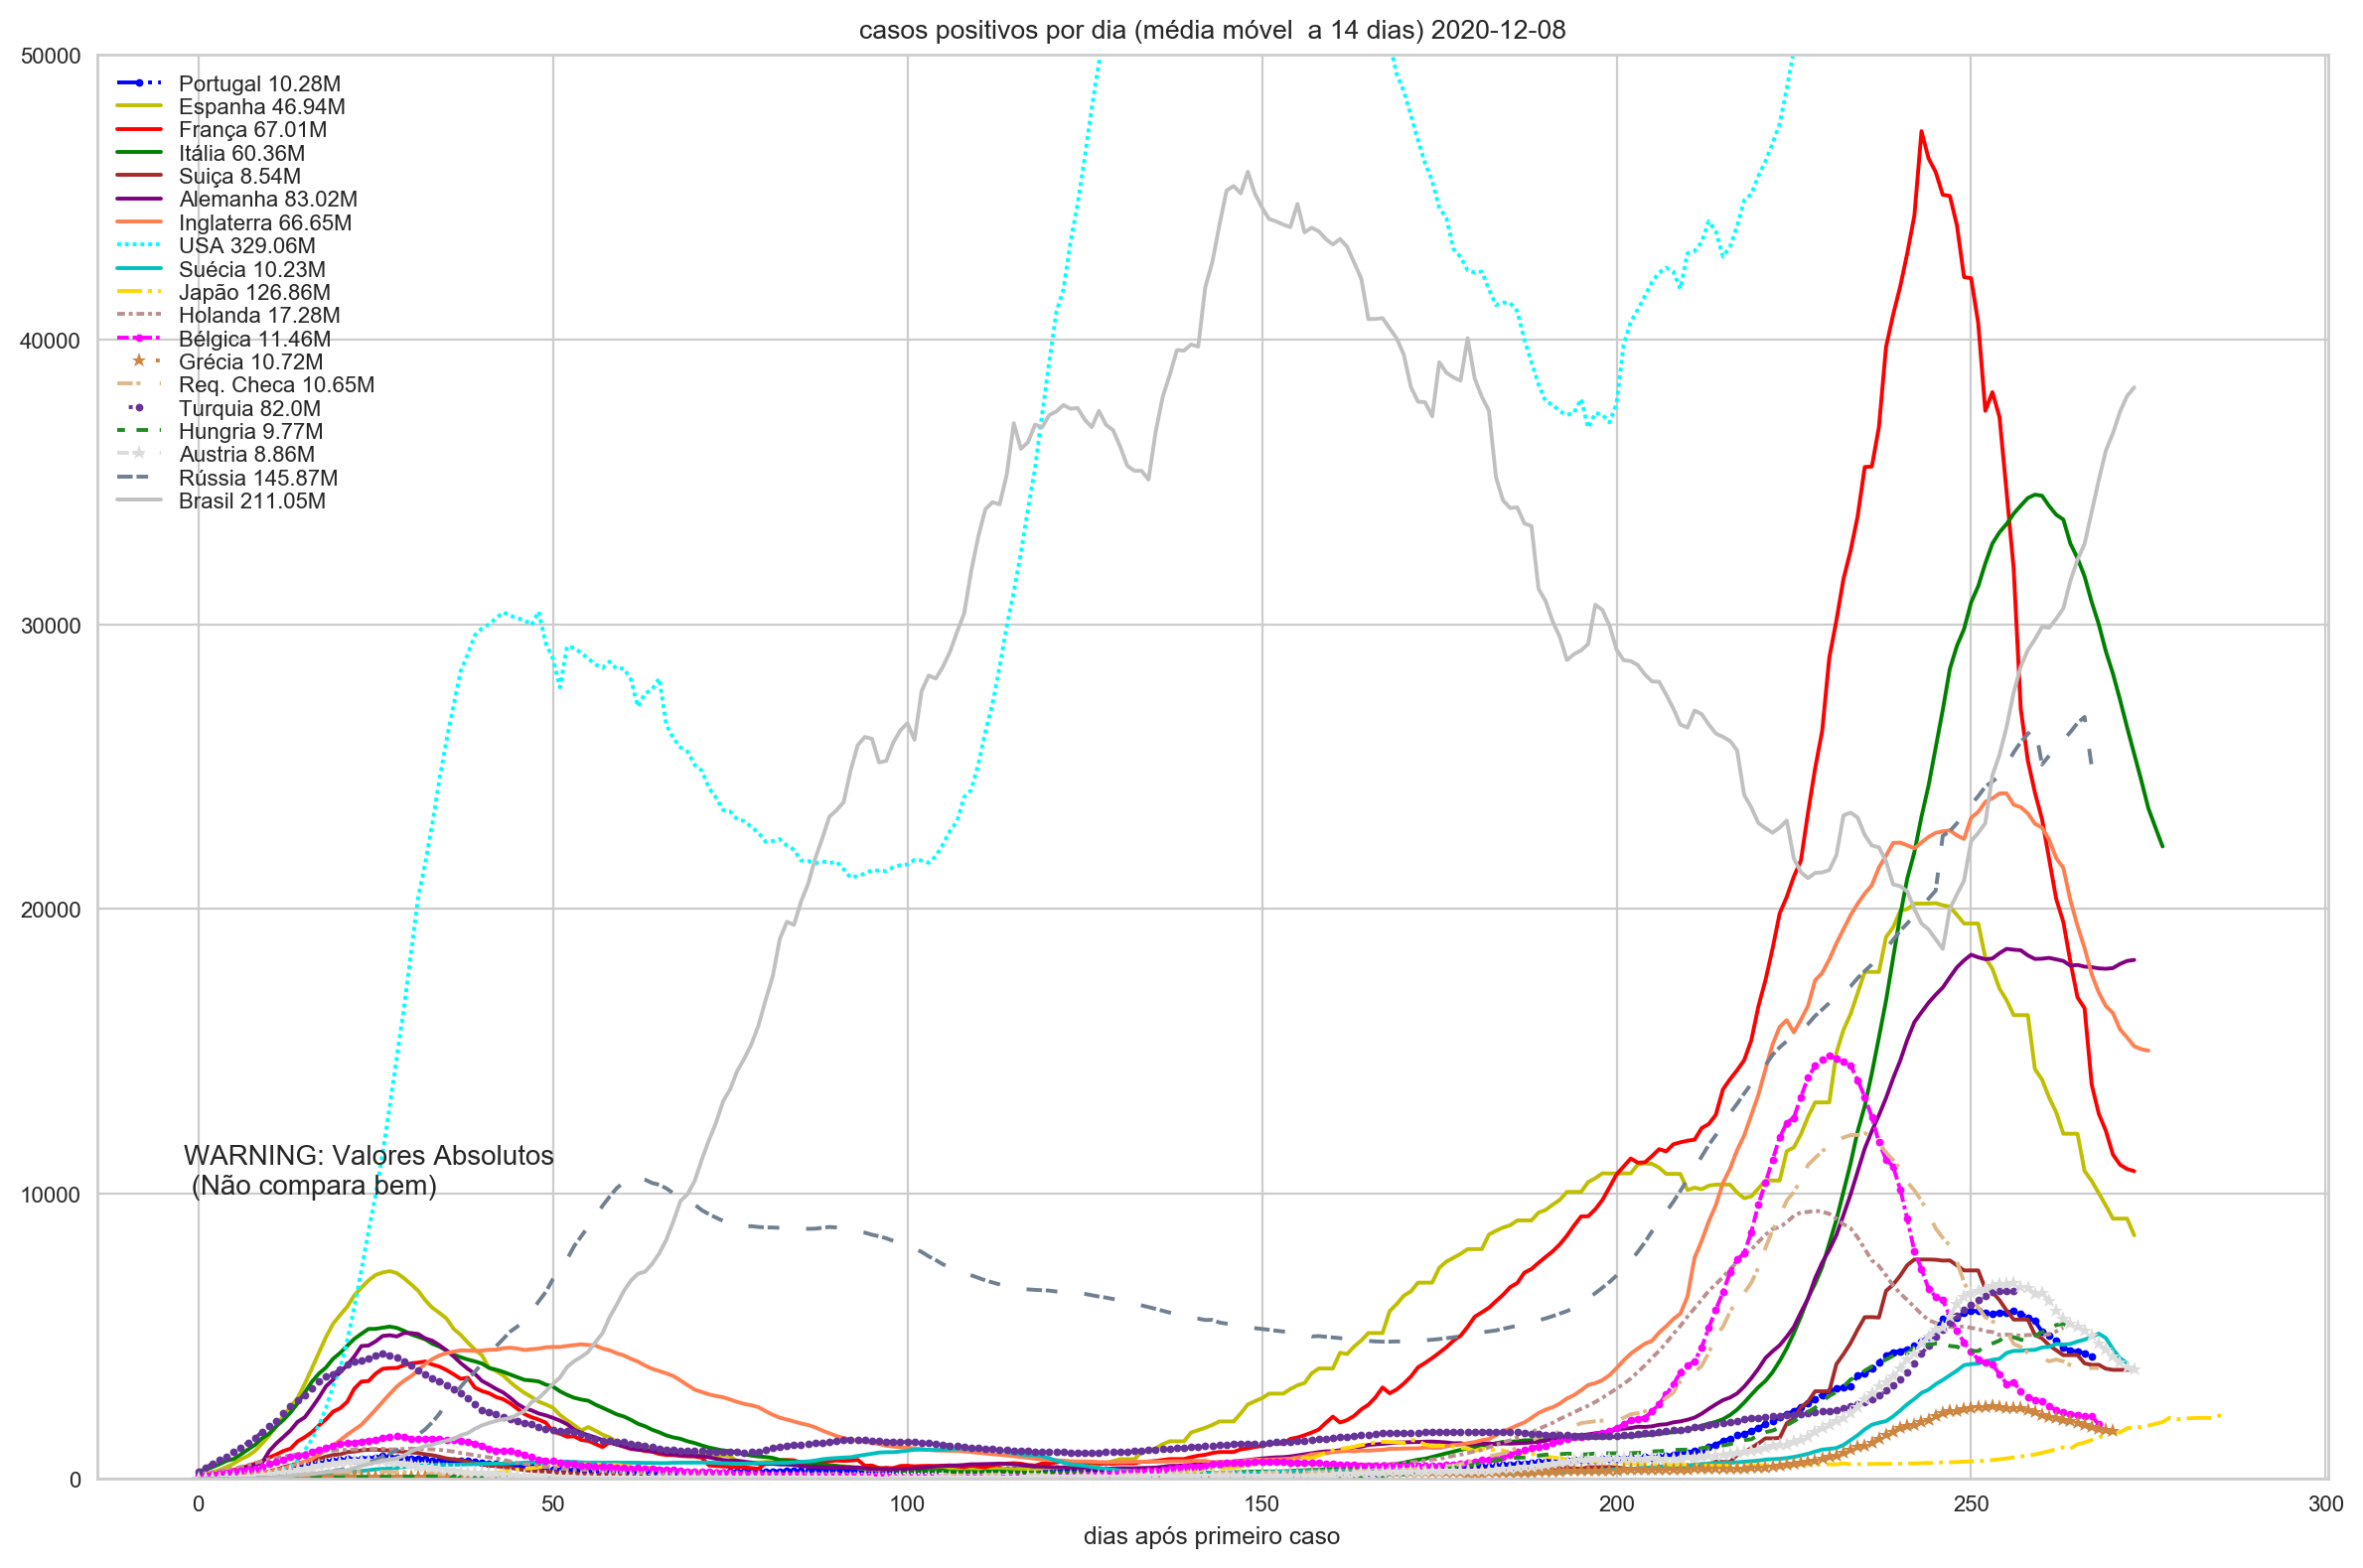

In [46]:
# # CASOS POSITIVOS

# In[208]:
for country in countrieslist0:
    plt.plot(moving_average(country['cases'],MA),
             label=country['label']+' '+str(round(country['pop']/10.0,2))+'M',
             ls=country['ls'],marker=country['markers'],
            color=country['color'])

plt.legend()
plt.ylim(0,50000)
plt.text(-2,10000,'WARNING: Valores Absolutos\n (Não compara bem)')
plt.xlabel("dias após primeiro caso")
plt.title('casos positivos por dia (média móvel  a '+str(MA)+' dias) '+str(date.today()))
#plt.savefig('casospospordia'+str(date.today())+'.png')
#plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


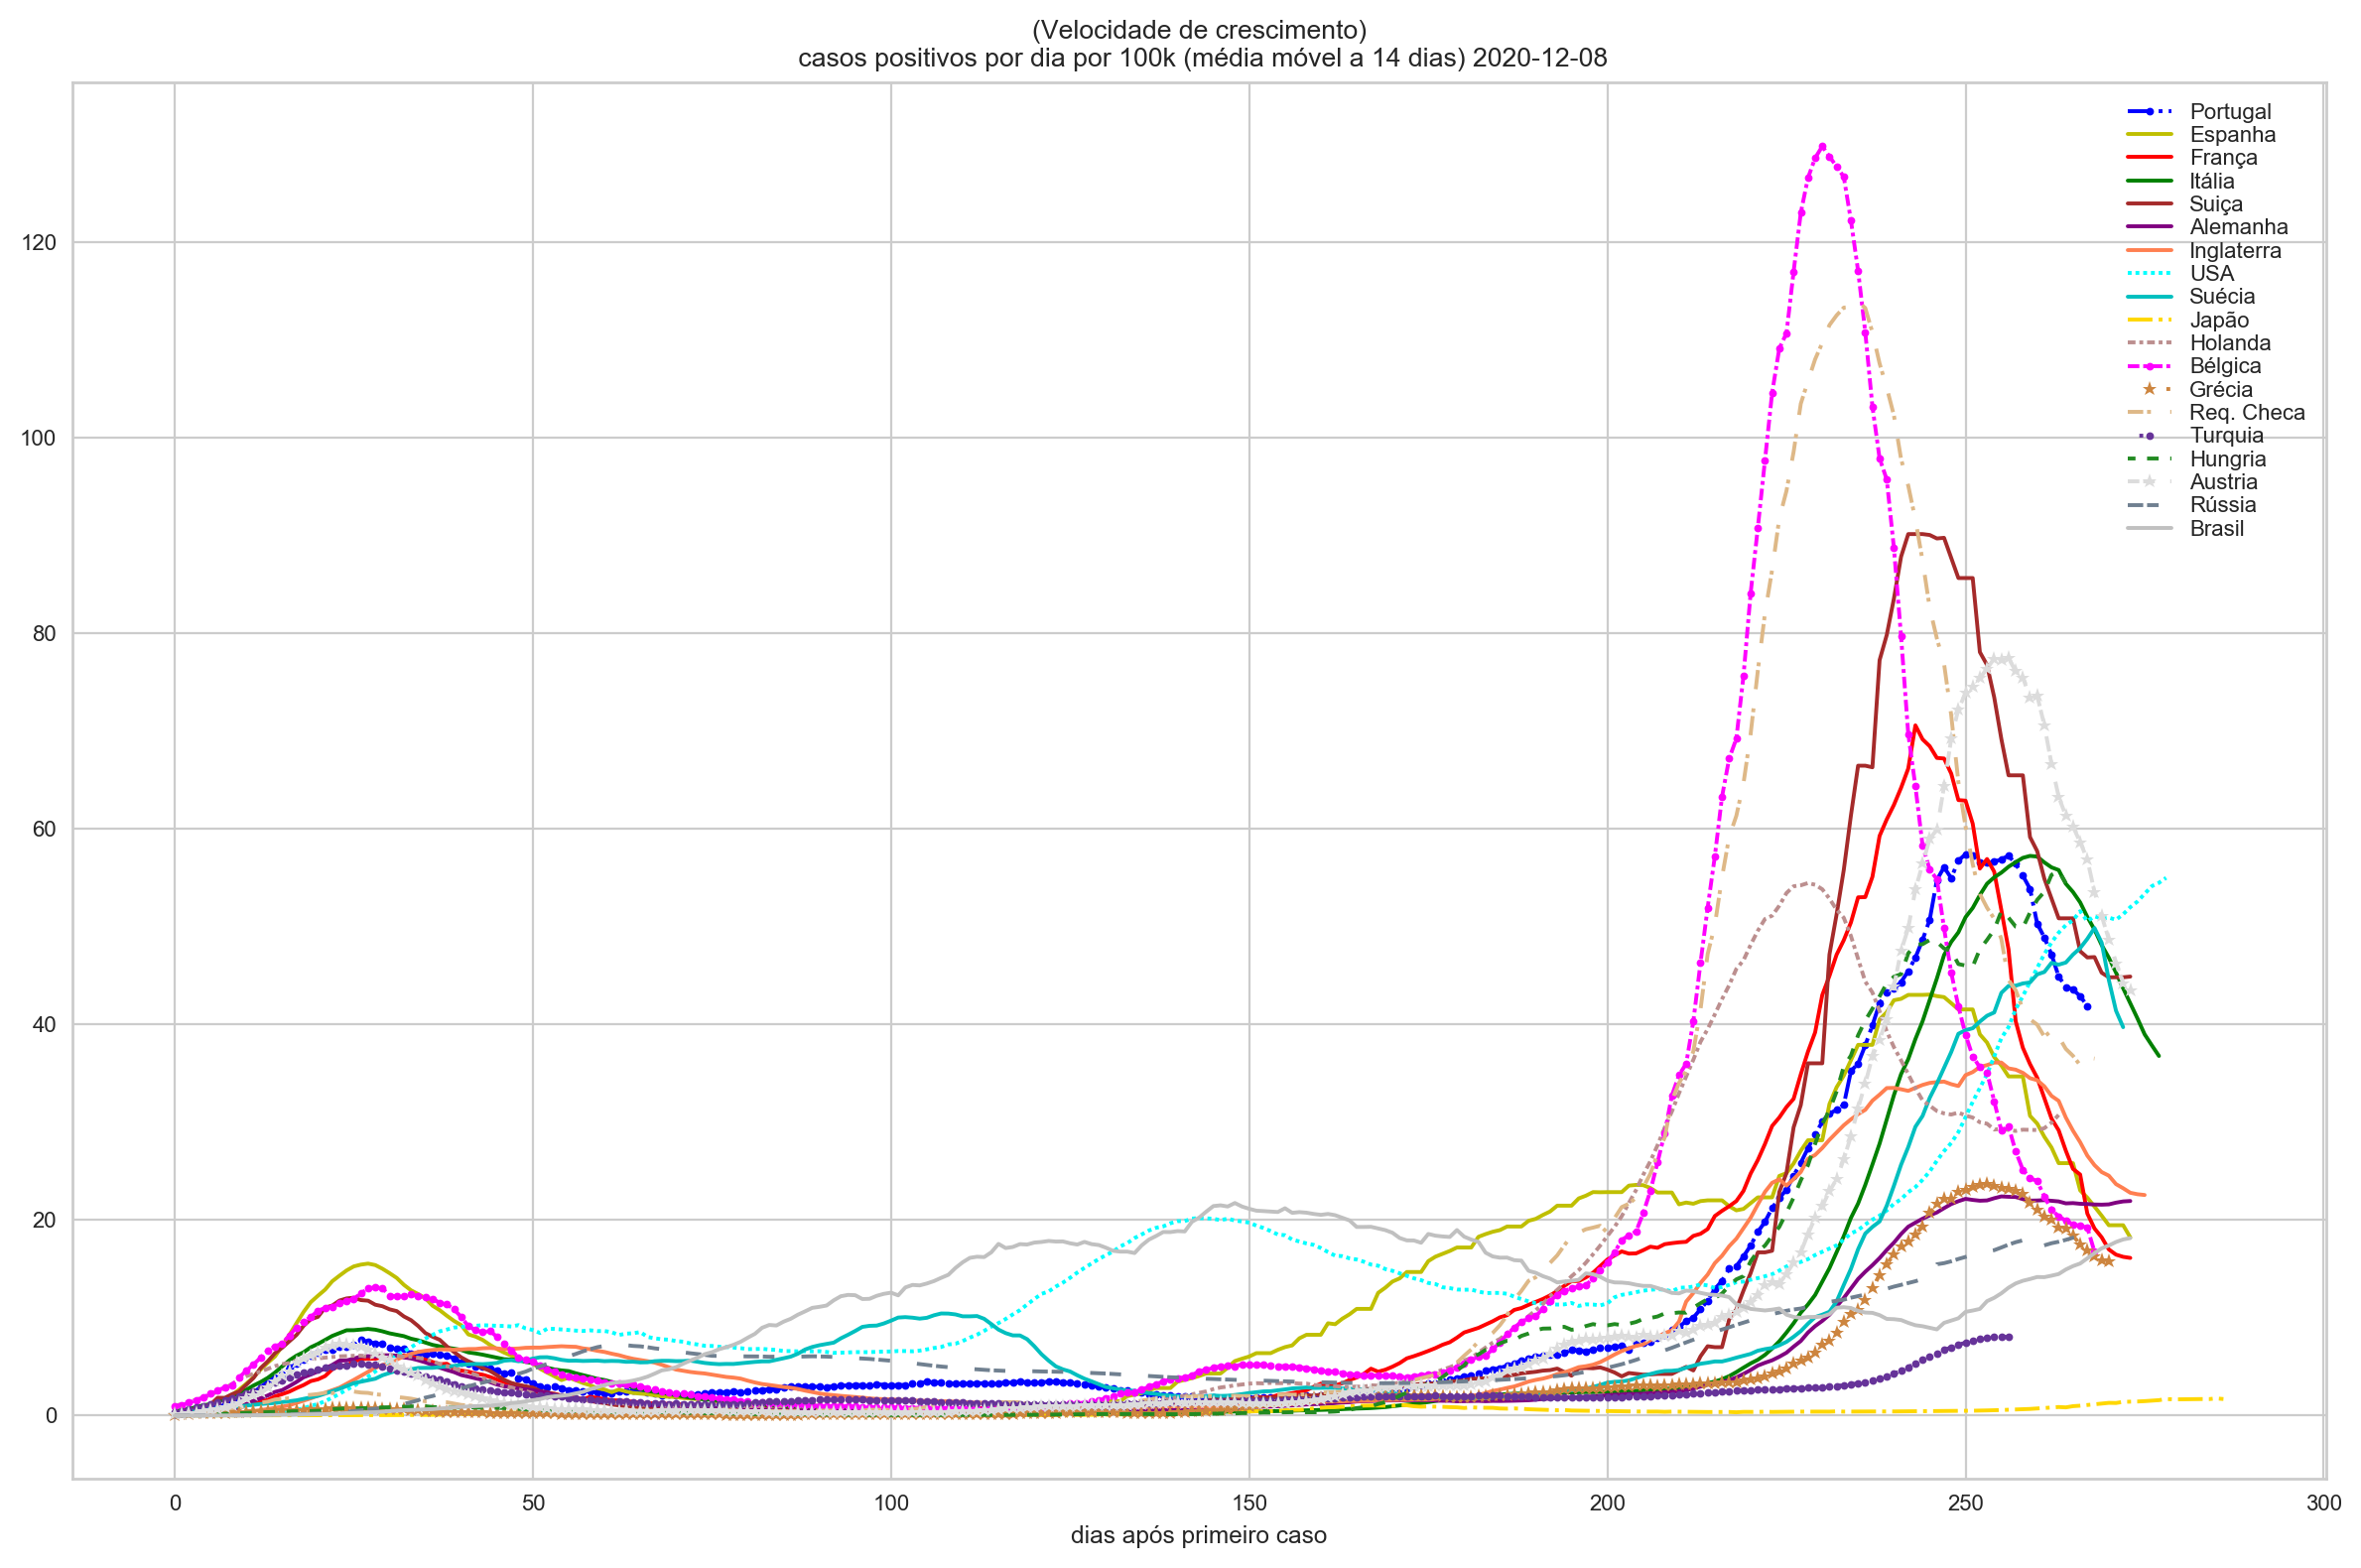

In [47]:
# In[209]:


for country in countrieslist0:
    plt.plot(moving_average(country['cases']/country['pop'],MA),
        label=country['label'], ls=country['ls'],marker=country['markers'],color=country['color'])
plt.xlabel("dias após primeiro caso")
plt.title('(Velocidade de crescimento)\n casos positivos por dia por 100k (média móvel a '+str(MA)+' dias) '+str(date.today()))
#plt.text(5,100,'O período de incubação médio\n $\\approx$ 6 dias\n mas há casos entre 2 e 27 dias')
plt.legend()
#plt.ylim(0,1200)
#plt.savefig('casospospordiapor100milmedia'+str(date.today())+'.png')
#plt.show()

Text(0.5, 1.0, 'casos positivos acumulados (por 100k) 2020-12-08')

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


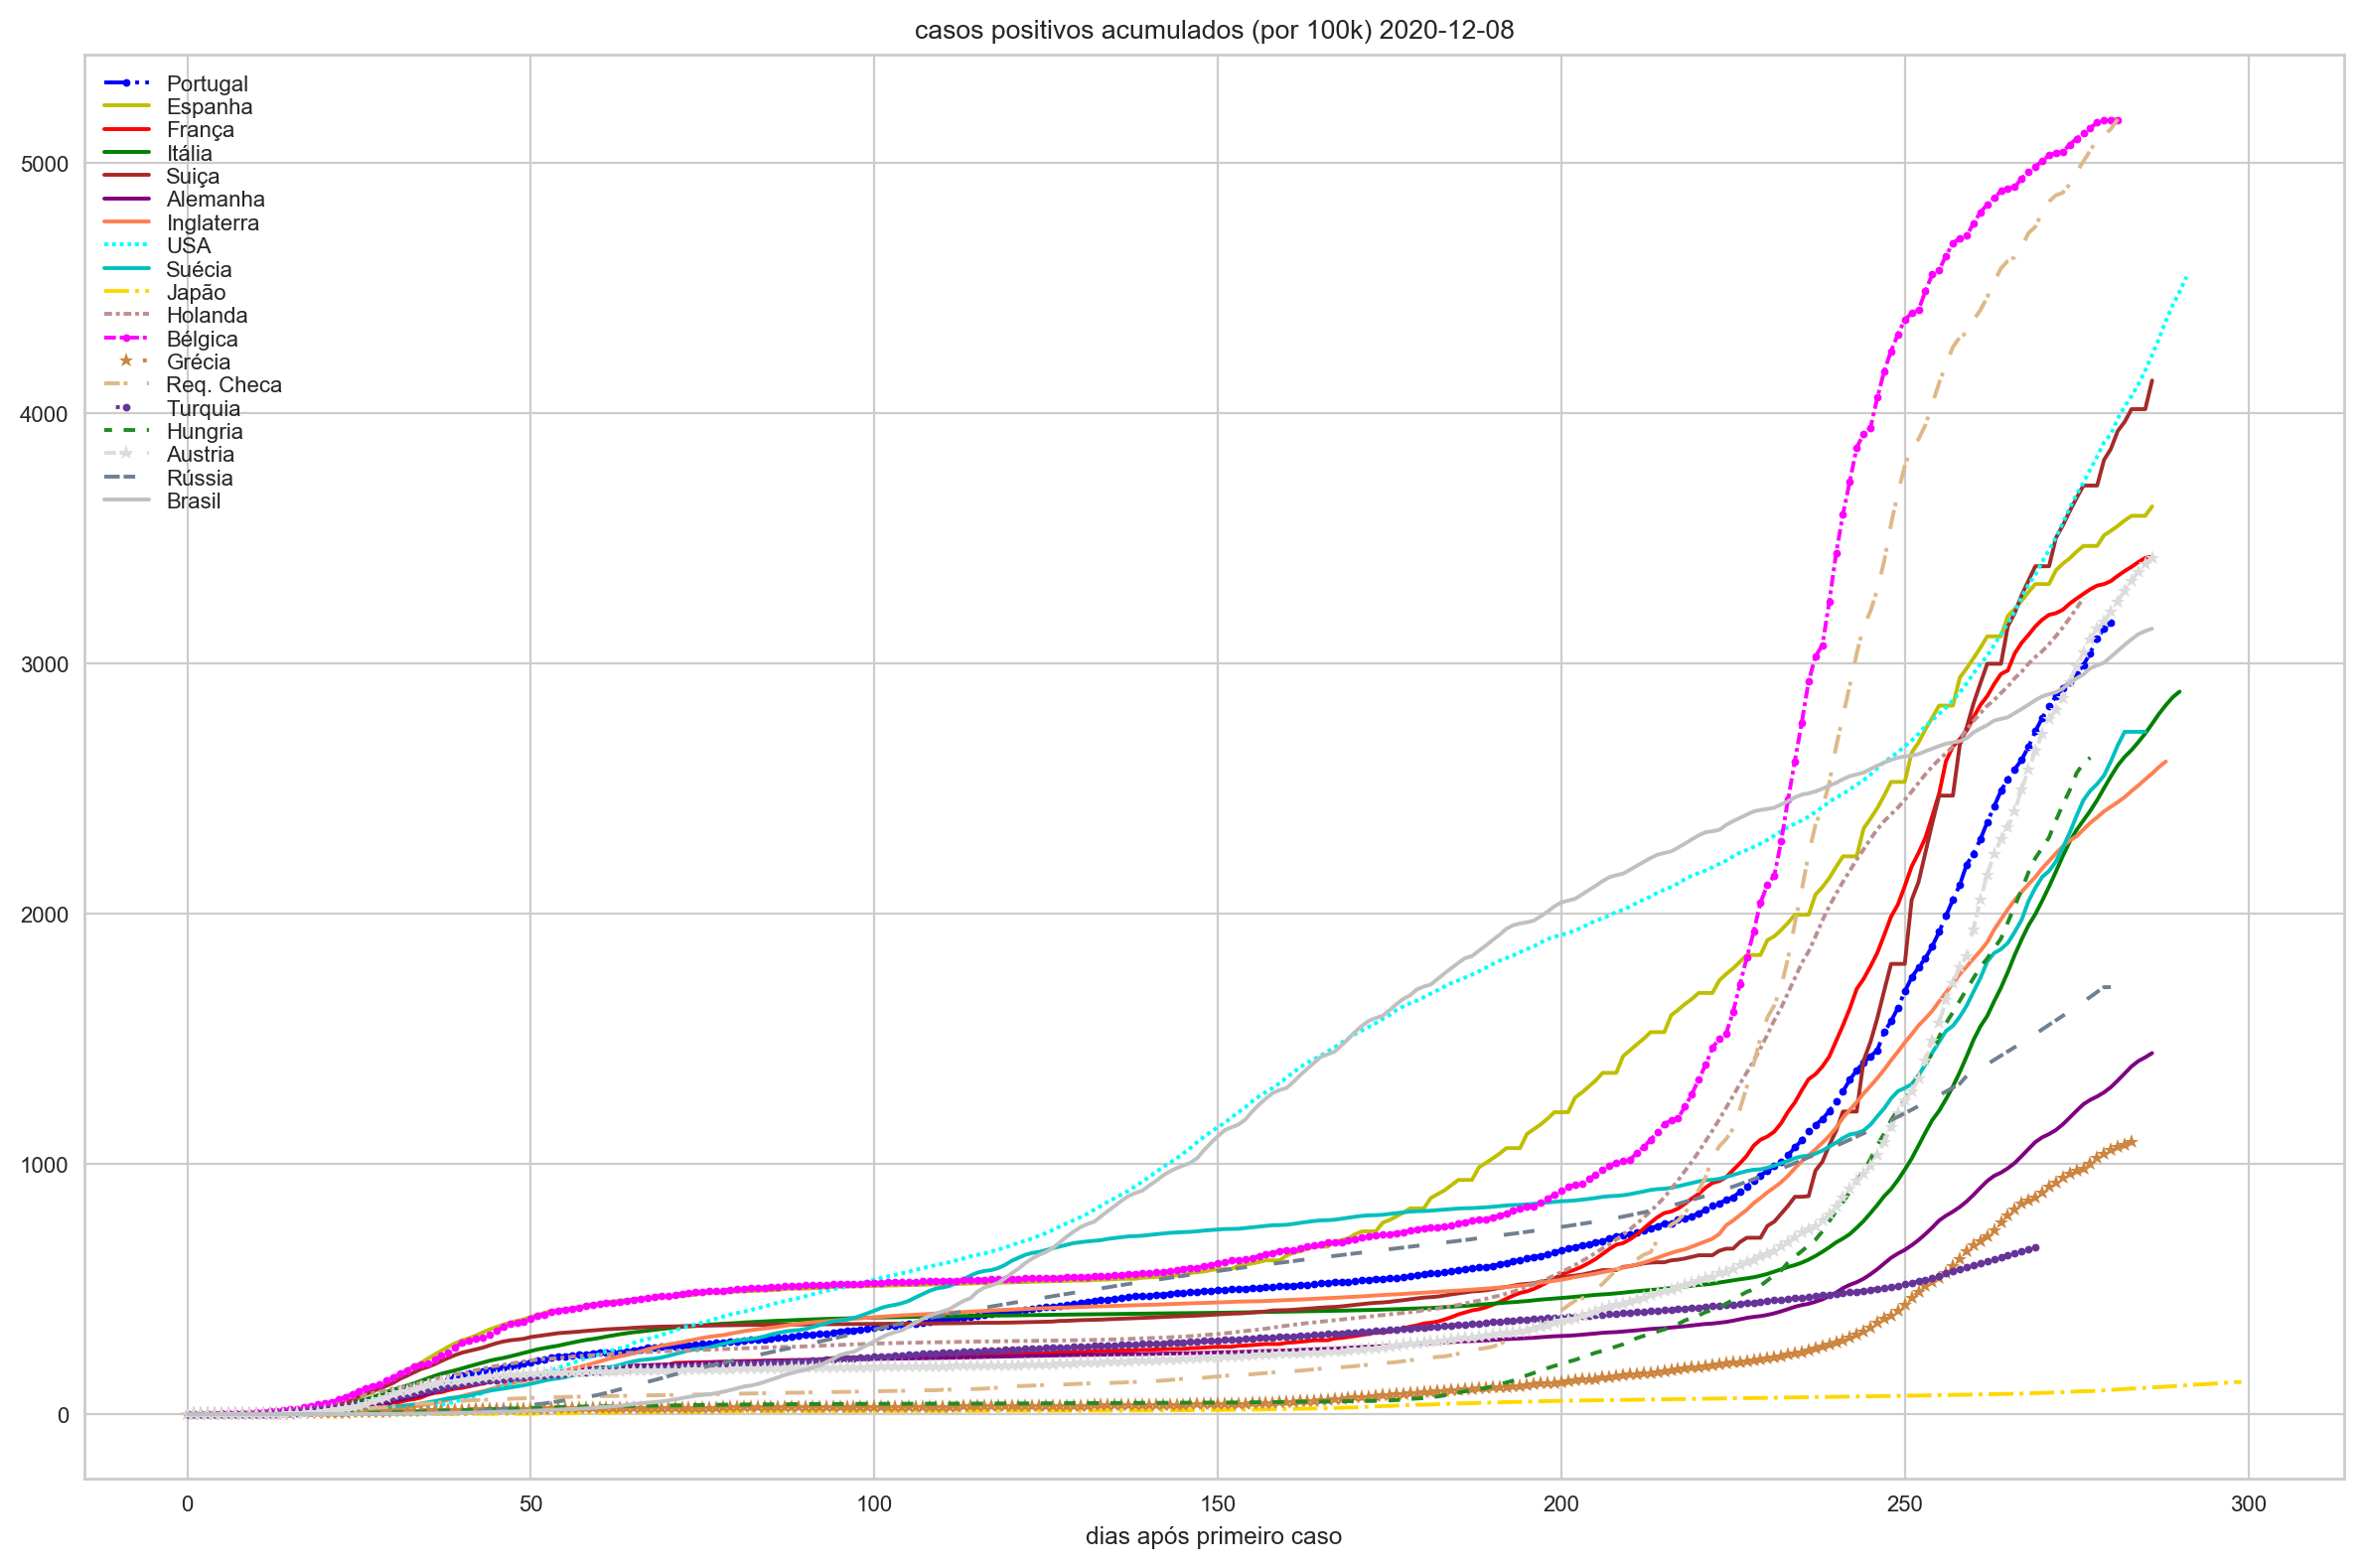

In [48]:
# In[211]:
for country in countrieslist0:
    plt.plot(country['cases'].cumsum()/country['pop'],
             label=country['label'], ls=country['ls'],marker=country['markers'],
             color=country['color'])
plt.legend()
plt.xlabel("dias após primeiro caso")
plt.title('casos positivos acumulados (por 100k) '+str(date.today()))
#plt.savefig('casospospordiaacumuladopor100k'+str(date.today())+'.png')
#plt.show()

Text(0.5, 1.0, 'Mortos por dia (valores absolutos média a 14dias)2020-12-08')

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


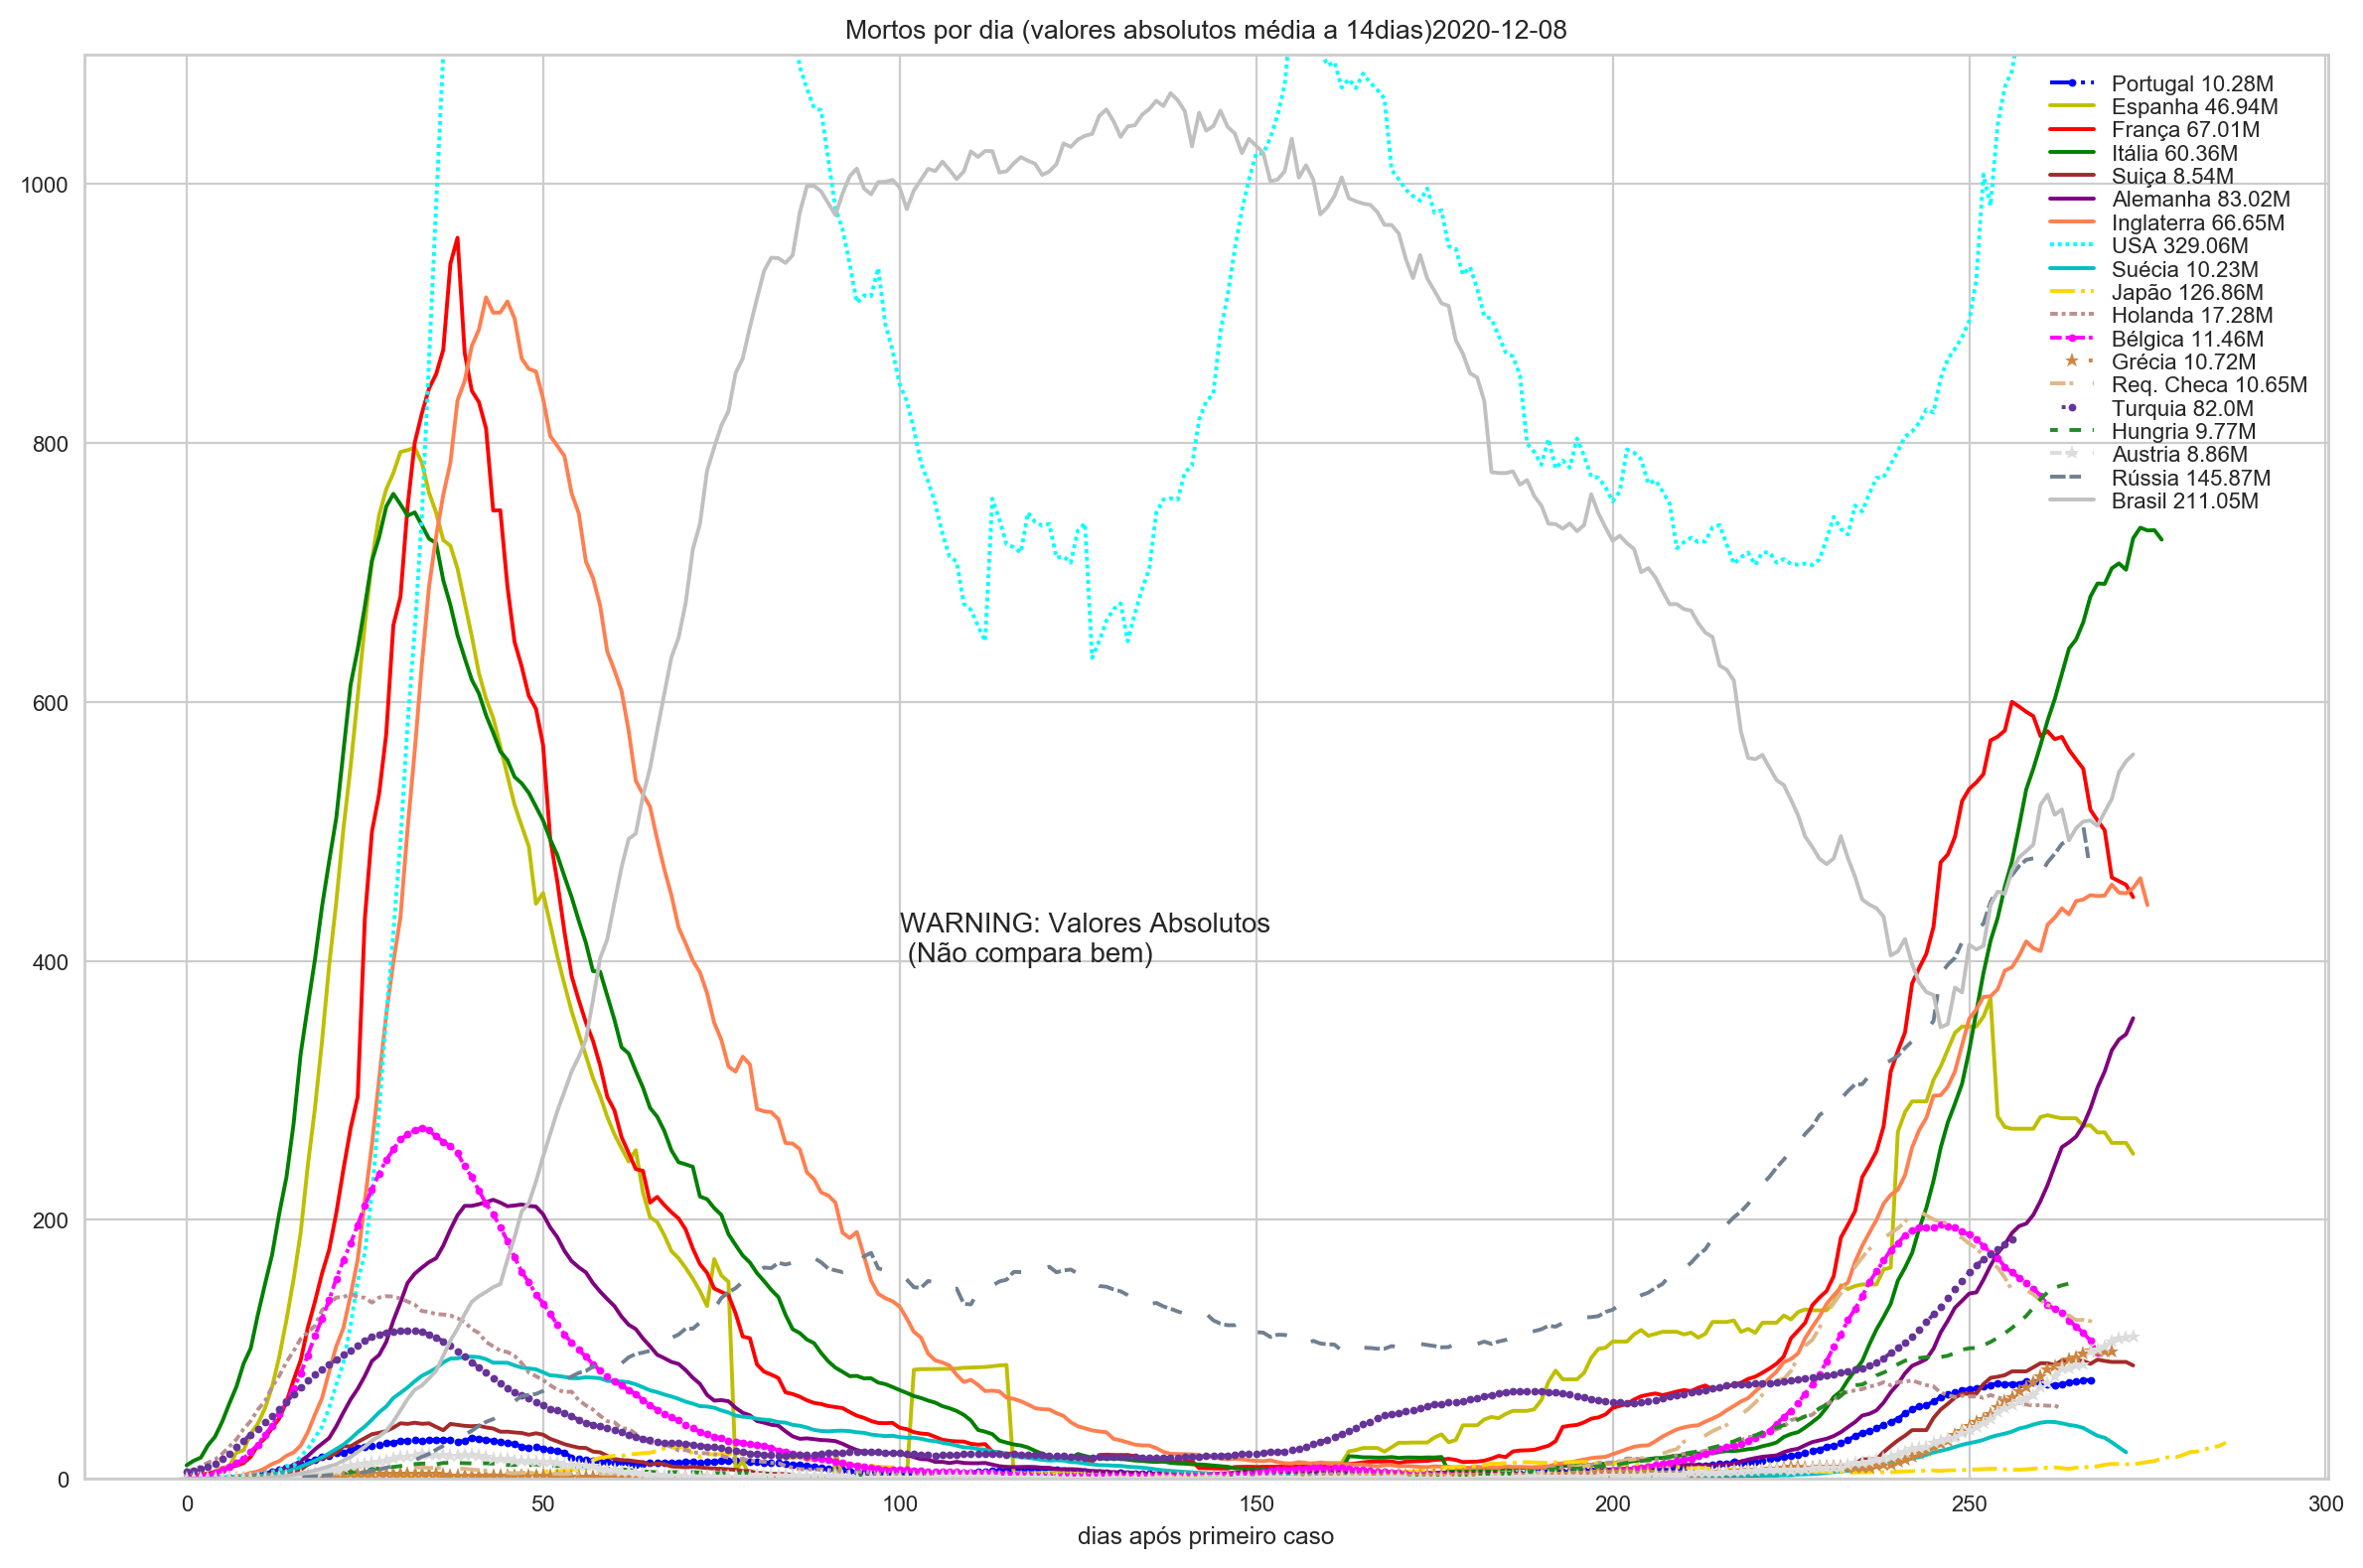

In [49]:
# # MORTOS

# In[212]:
for country in countrieslist0:
    plt.plot(moving_average(country['deaths'],MA),
             label=country['label']+' '+str(round(country['pop']/10.0,2))+'M',
             ls=country['ls'],marker=country['markers'],
             color=country['color'])
plt.legend(loc='upper right')
plt.ylim(0,1100)
plt.text(100,400,'WARNING: Valores Absolutos\n (Não compara bem)')
plt.xlabel("dias após primeiro caso")
plt.title('Mortos por dia (valores absolutos média a '+str(MA)+'dias)'+str(date.today()))
#plt.savefig('mortospospordiamedia'+str(date.today())+'.png')
#plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


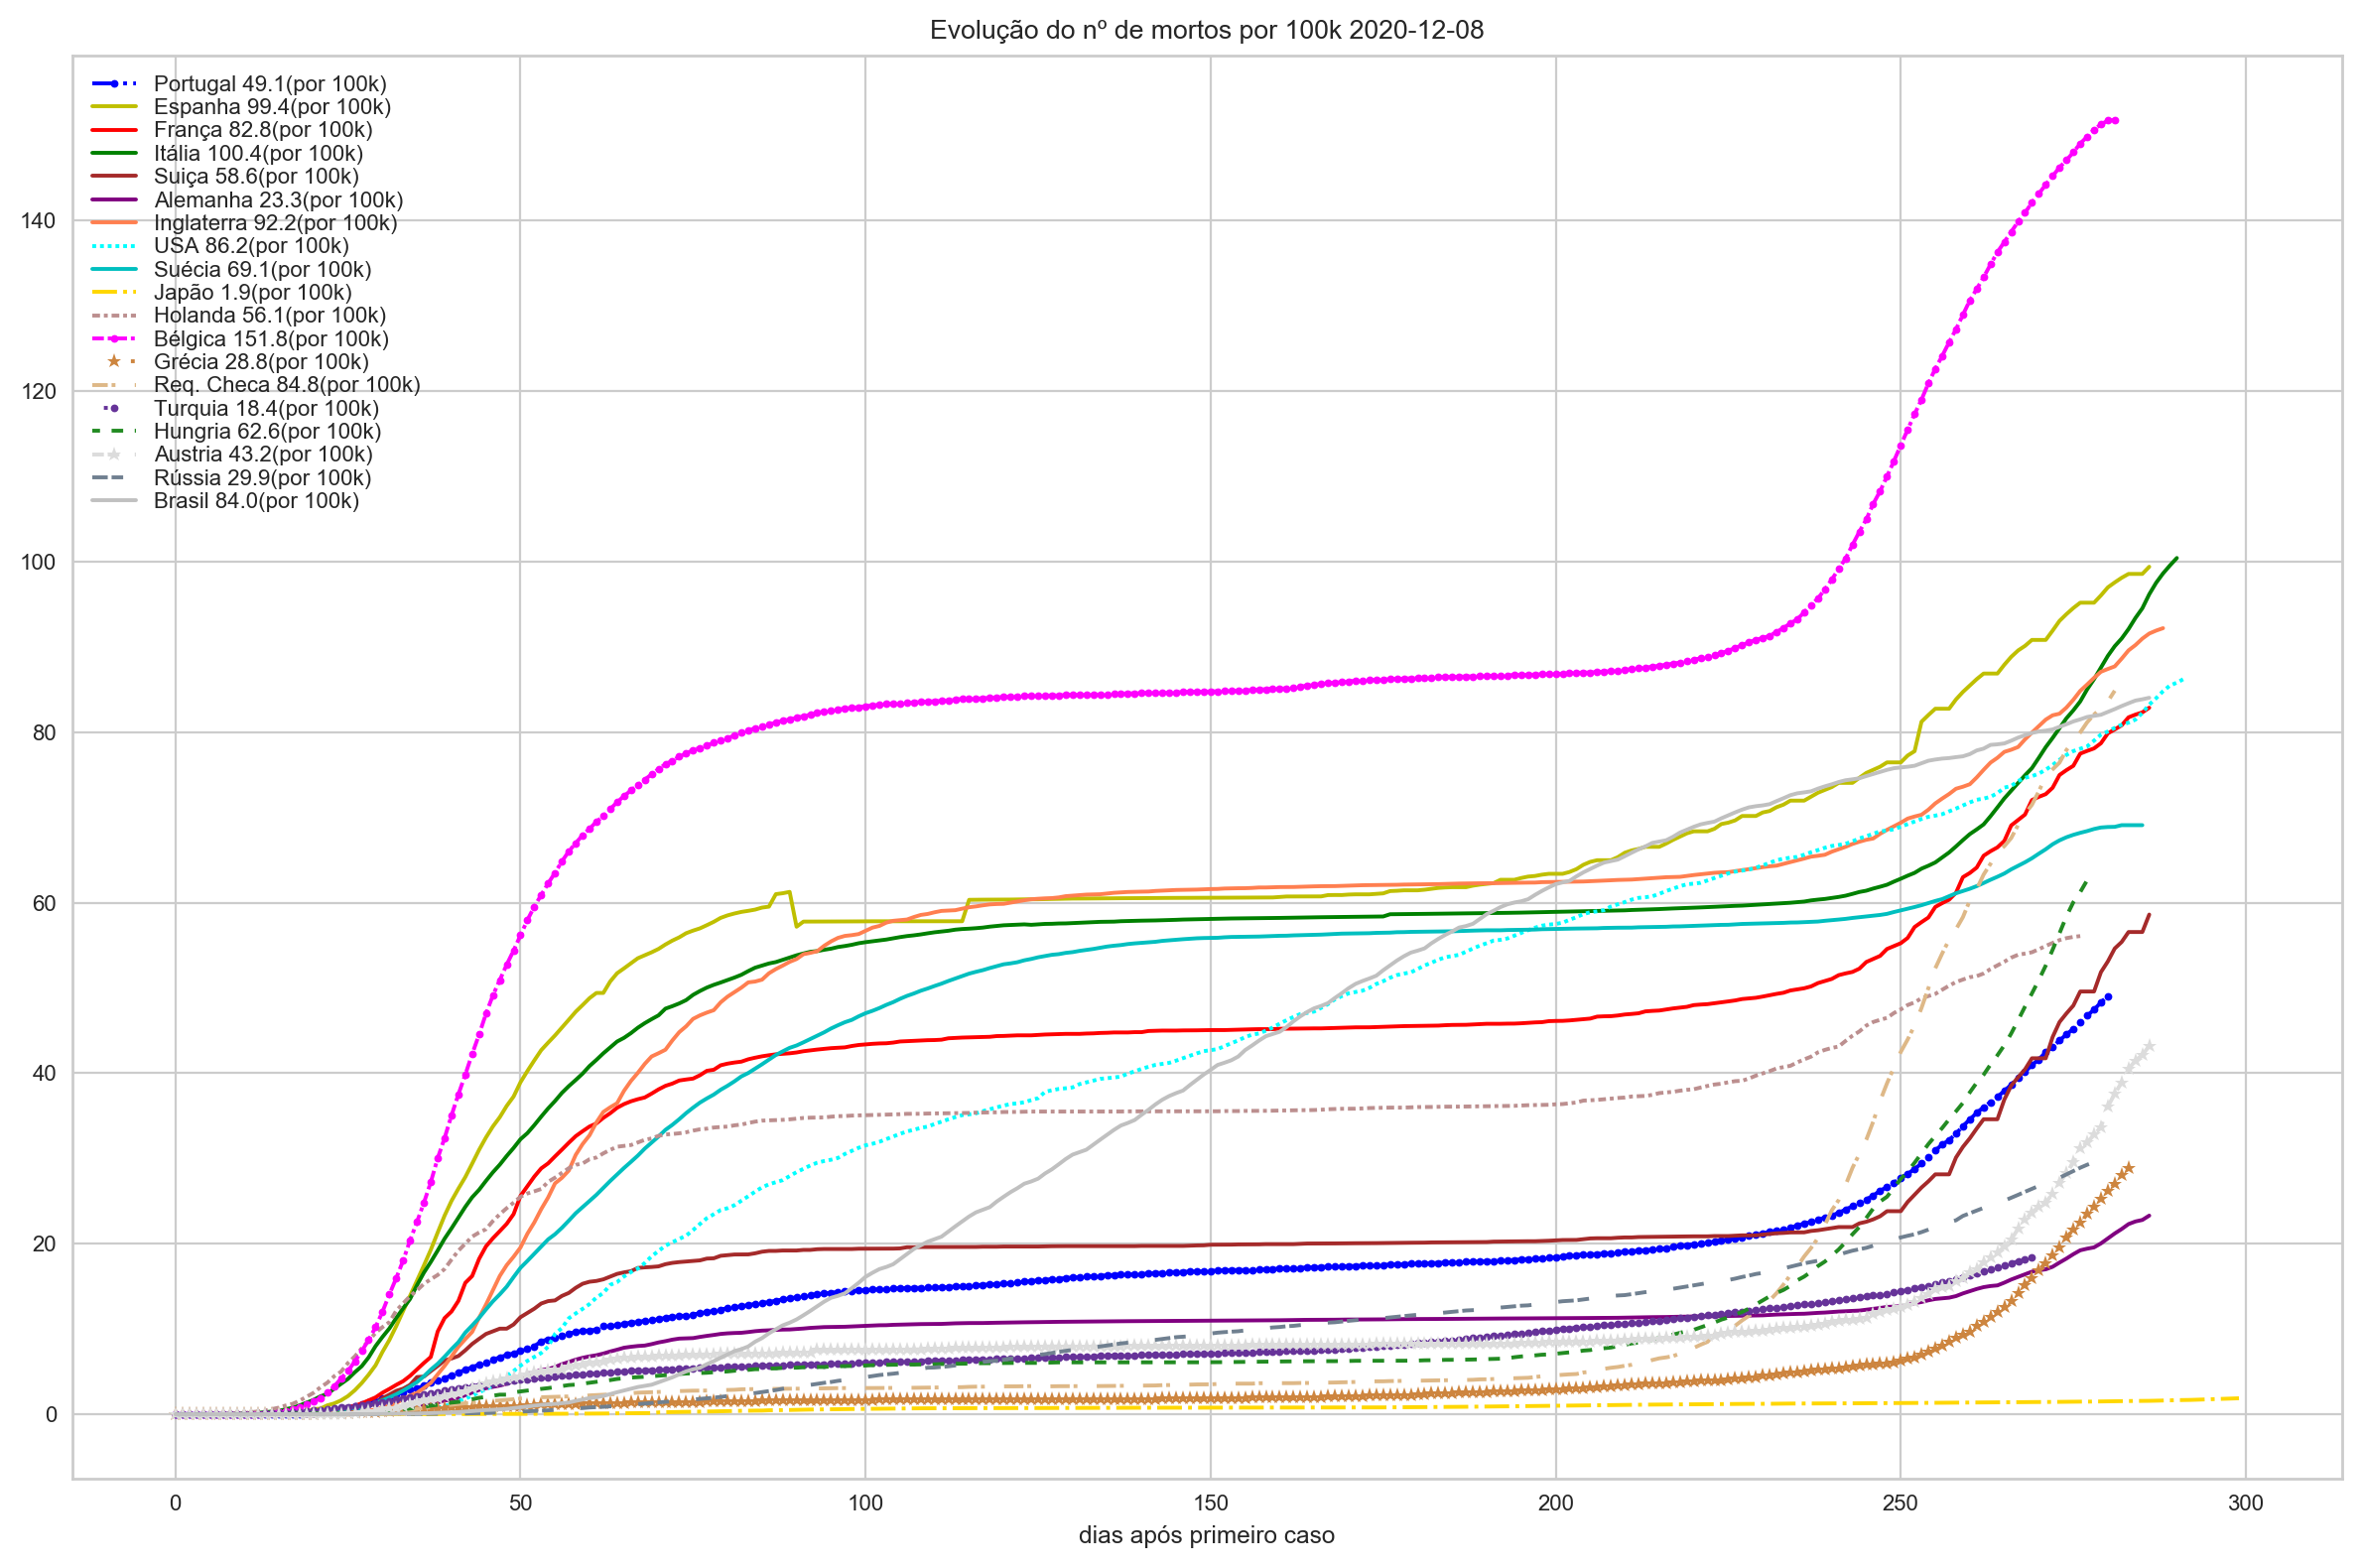

In [50]:
# In[213]:

for country in countrieslist0:
    plt.plot(country['deaths'].cumsum()/country['pop'],
             label=country['label']+' '+
             str(round(country['deaths'].cumsum().max()/country['pop'],1))+'(por 100k)',
             ls=country['ls'],marker=country['markers'],
             color=country['color'])

#plt.text(0,35,'?China: '+str(round(china['deaths'].cumsum().max()/china['pop'],1))+'($\\times$ M. Hab.)?')
#plt.text(0,25,'?China-Wuhan: '+str(round(china['deaths'].cumsum().max()/NcnW,1))+'/($\\times$ M. Hab.)?')
plt.xlabel("dias após primeiro caso")
#plt.xlim(0,40)
#plt.ylim(0,175)
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.legend(loc='upper left')
plt.title('Evolução do nº de mortos por 100k '+str(date.today()))
#plt.savefig('mortoscaumpor100k'+str(date.today())+'.png')
#plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


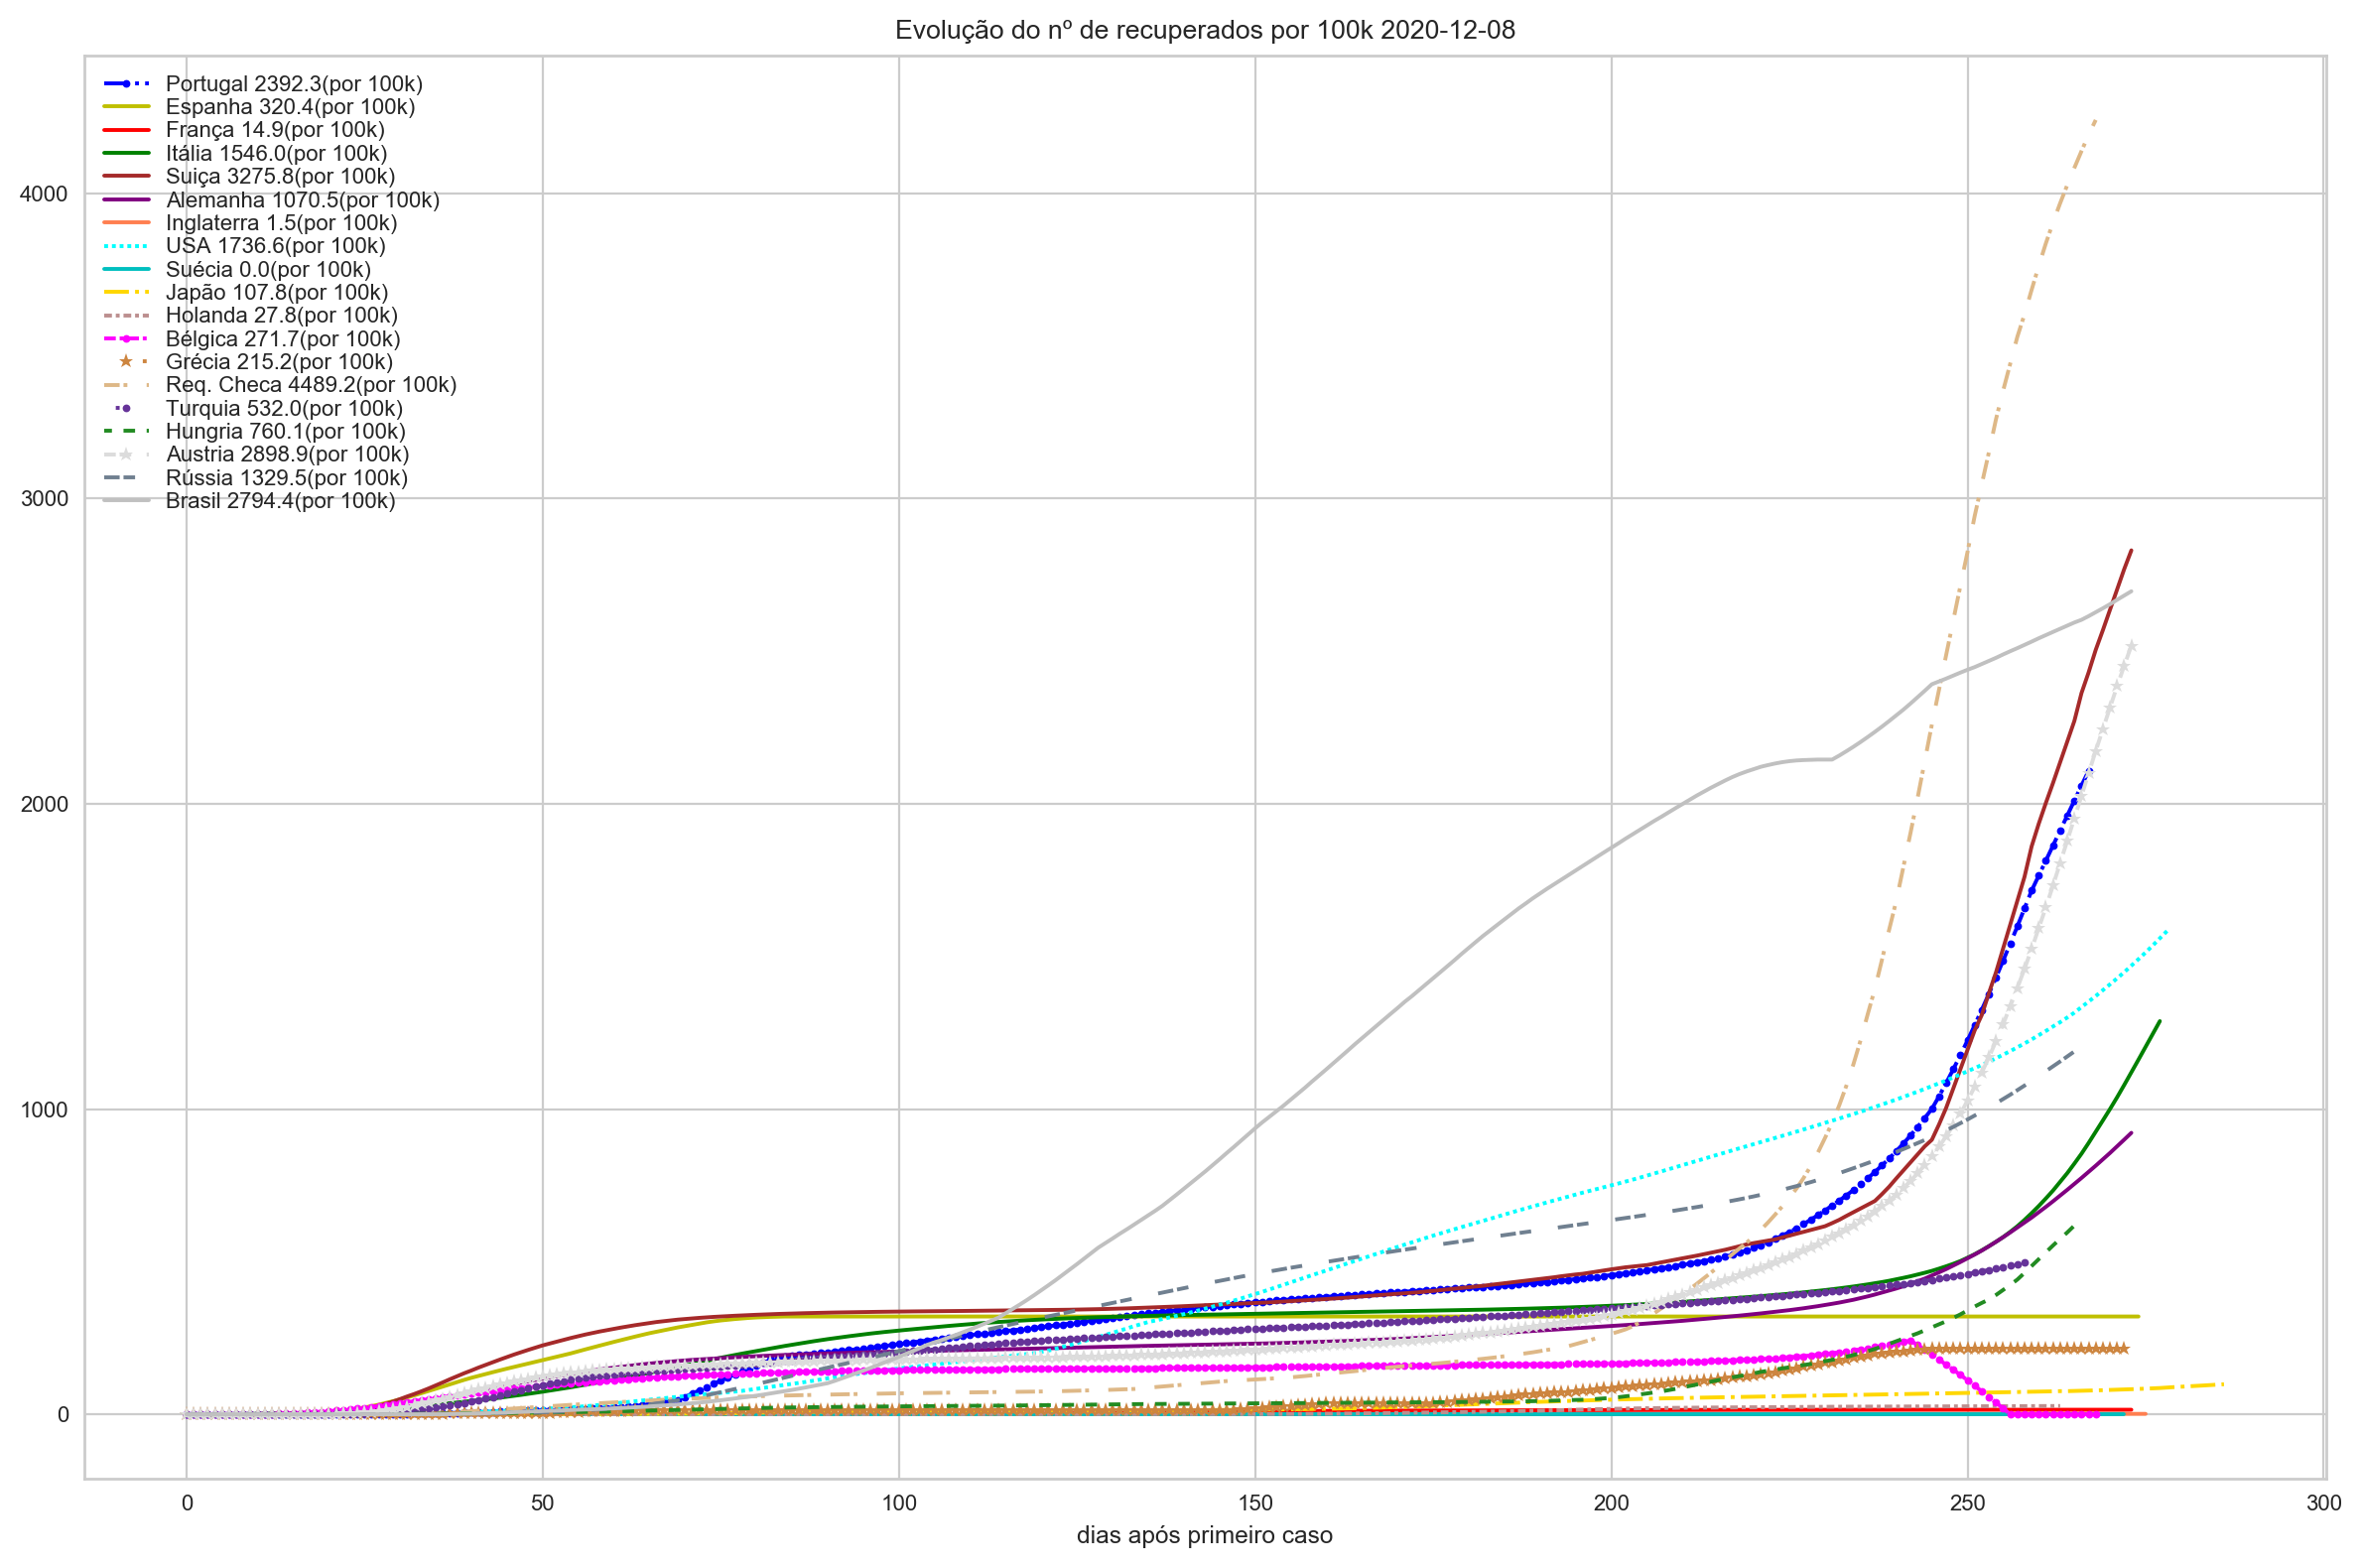

In [51]:
############################################## RECUPERADOS #################
for country in countrieslist0:
    plt.plot(moving_average(country['recovered']/country['pop'],MA),
             label=country['label']+' '+
             str(round(country['recovered'].max()/country['pop'],1))+'(por 100k)',
             ls=country['ls'],marker=country['markers'],
             color=country['color'])

plt.xlabel("dias após primeiro caso")
#plt.xlim(0,40)
#plt.ylim(0,16500)
plt.legend(loc='upper left')
#plt.yscale('log')
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.title('Evolução do nº de recuperados por 100k '+str(date.today()))
#plt.savefig('recuppor100k'+str(date.today())+'.png')
#plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


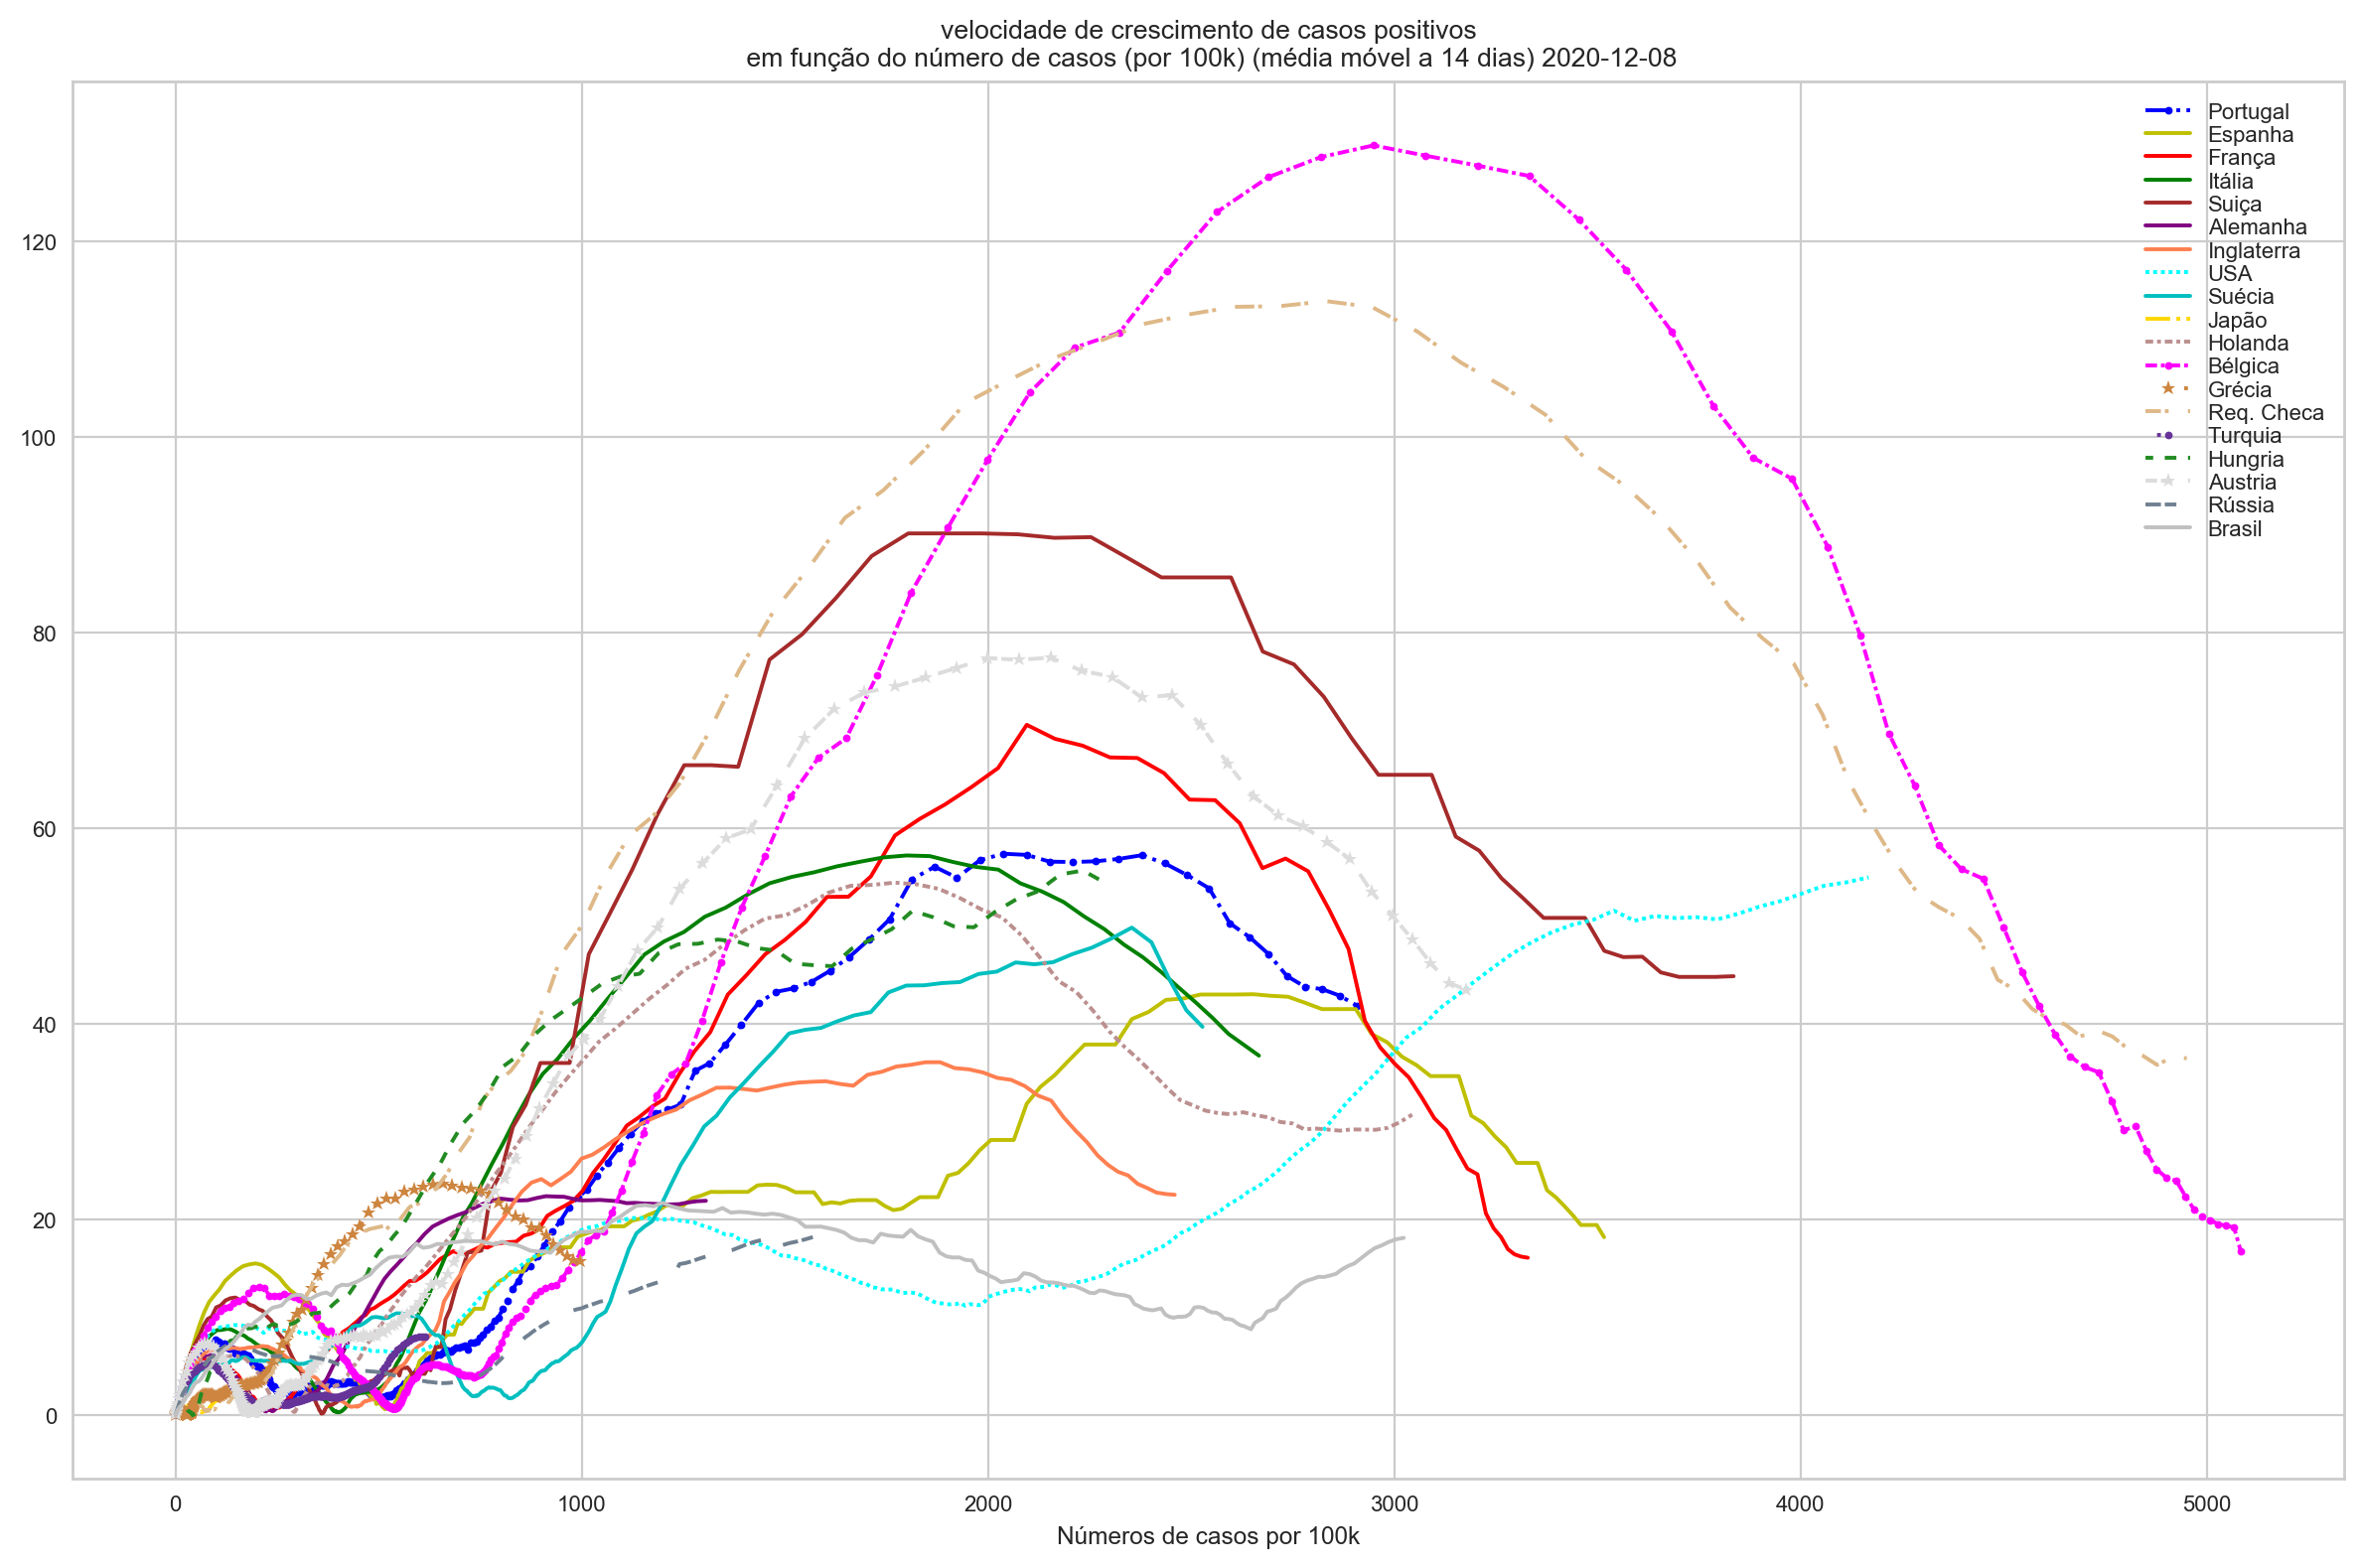

In [52]:
#  # CURVAS DE FASE DE CRESCIMENTO DE CASOS POSITIVOS

# In[210]:


# china['pop']=NcnW
# MA=6
for country in countrieslist0:
    plt.plot(moving_average(country['cases'].cumsum()/country['pop'],MA),moving_average(country['cases']/country['pop'],MA),
             label=country['label'], ls=country['ls'],marker=country['markers'],color=country['color'])
    # x=moving_average(country['cases'].cumsum()/country['pop'],MA)
    # y=moving_average(country['cases']/country['pop'],MA)
    # z = np.polyfit(x, y, 2)
    # pz =np.poly1d(z)
    # x=np.linspace(0,3000,150)
    # ptest=pz(x)
    # plt.ylim(0,170)
    # plt.plot(x,ptest, ls='--',lw=0.5,marker=country['markers'],color=country['color'])
plt.xlabel("Números de casos por 100k")
plt.title('velocidade de crescimento de casos positivos\n em função do número de casos (por 100k) (média móvel a '+str(MA)+' dias) '+str(date.today()))
#plt.text(800,40,'O período de incubação médio\n $\\approx$ 6 dias\n mas há casos entre 2 e 27 dias')
plt.legend()
#plt.xlim(0,25000)
#plt.ylim(0,1000)
#plt.savefig('curvasdefase'+str(date.today())+'.png')
#plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


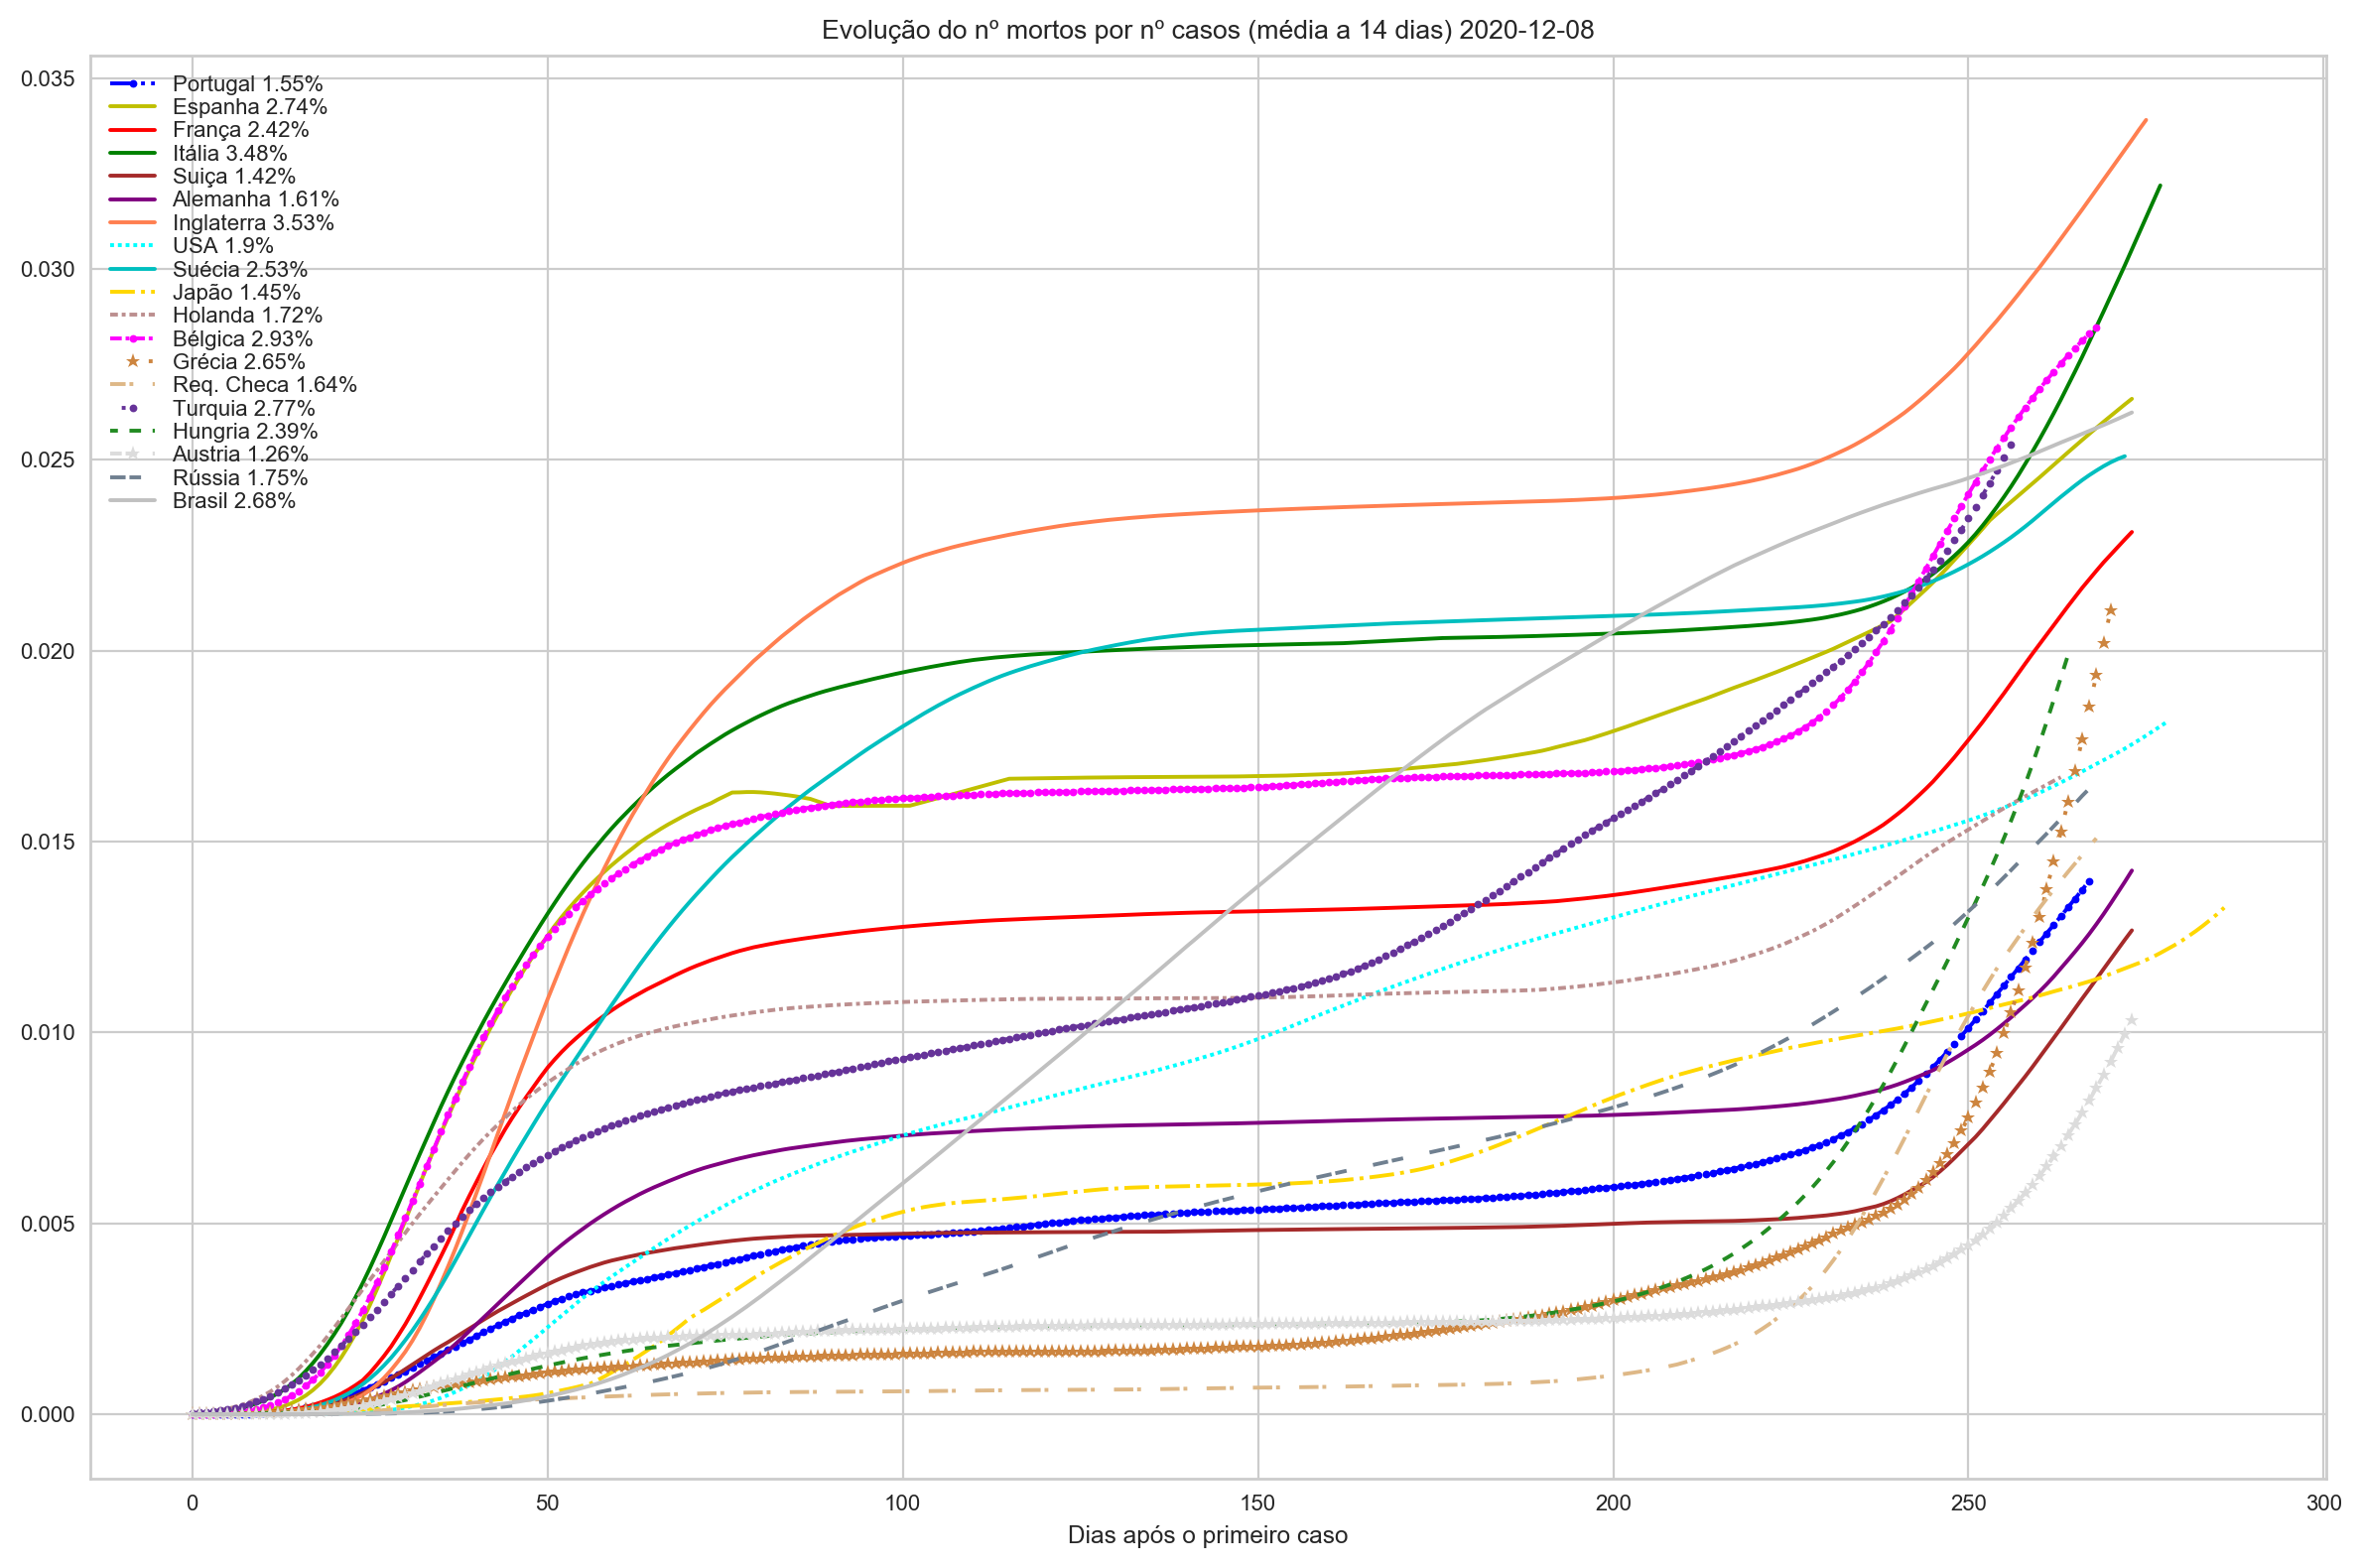

In [53]:
for country in countrieslist0:
    plt.plot(moving_average(
        country['deaths'].cumsum()/
        country['cases'].sum(),MA),
        label=country['label']+' '+str(round(country['deaths'].sum()/country['cases'].sum()*100,2))+'%',
             ls=country['ls'],marker=country['markers'],
        color=country['color'])

plt.xlabel("Dias após o primeiro caso")
plt.legend(loc='upper left')
plt.title('Evolução do nº mortos por nº casos (média a '+str(MA)+' dias) '+str(date.today()))
#plt.savefig('evolmortosporcasos'+str(date.today())+'.png')
#plt.show()

# In[216]:

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


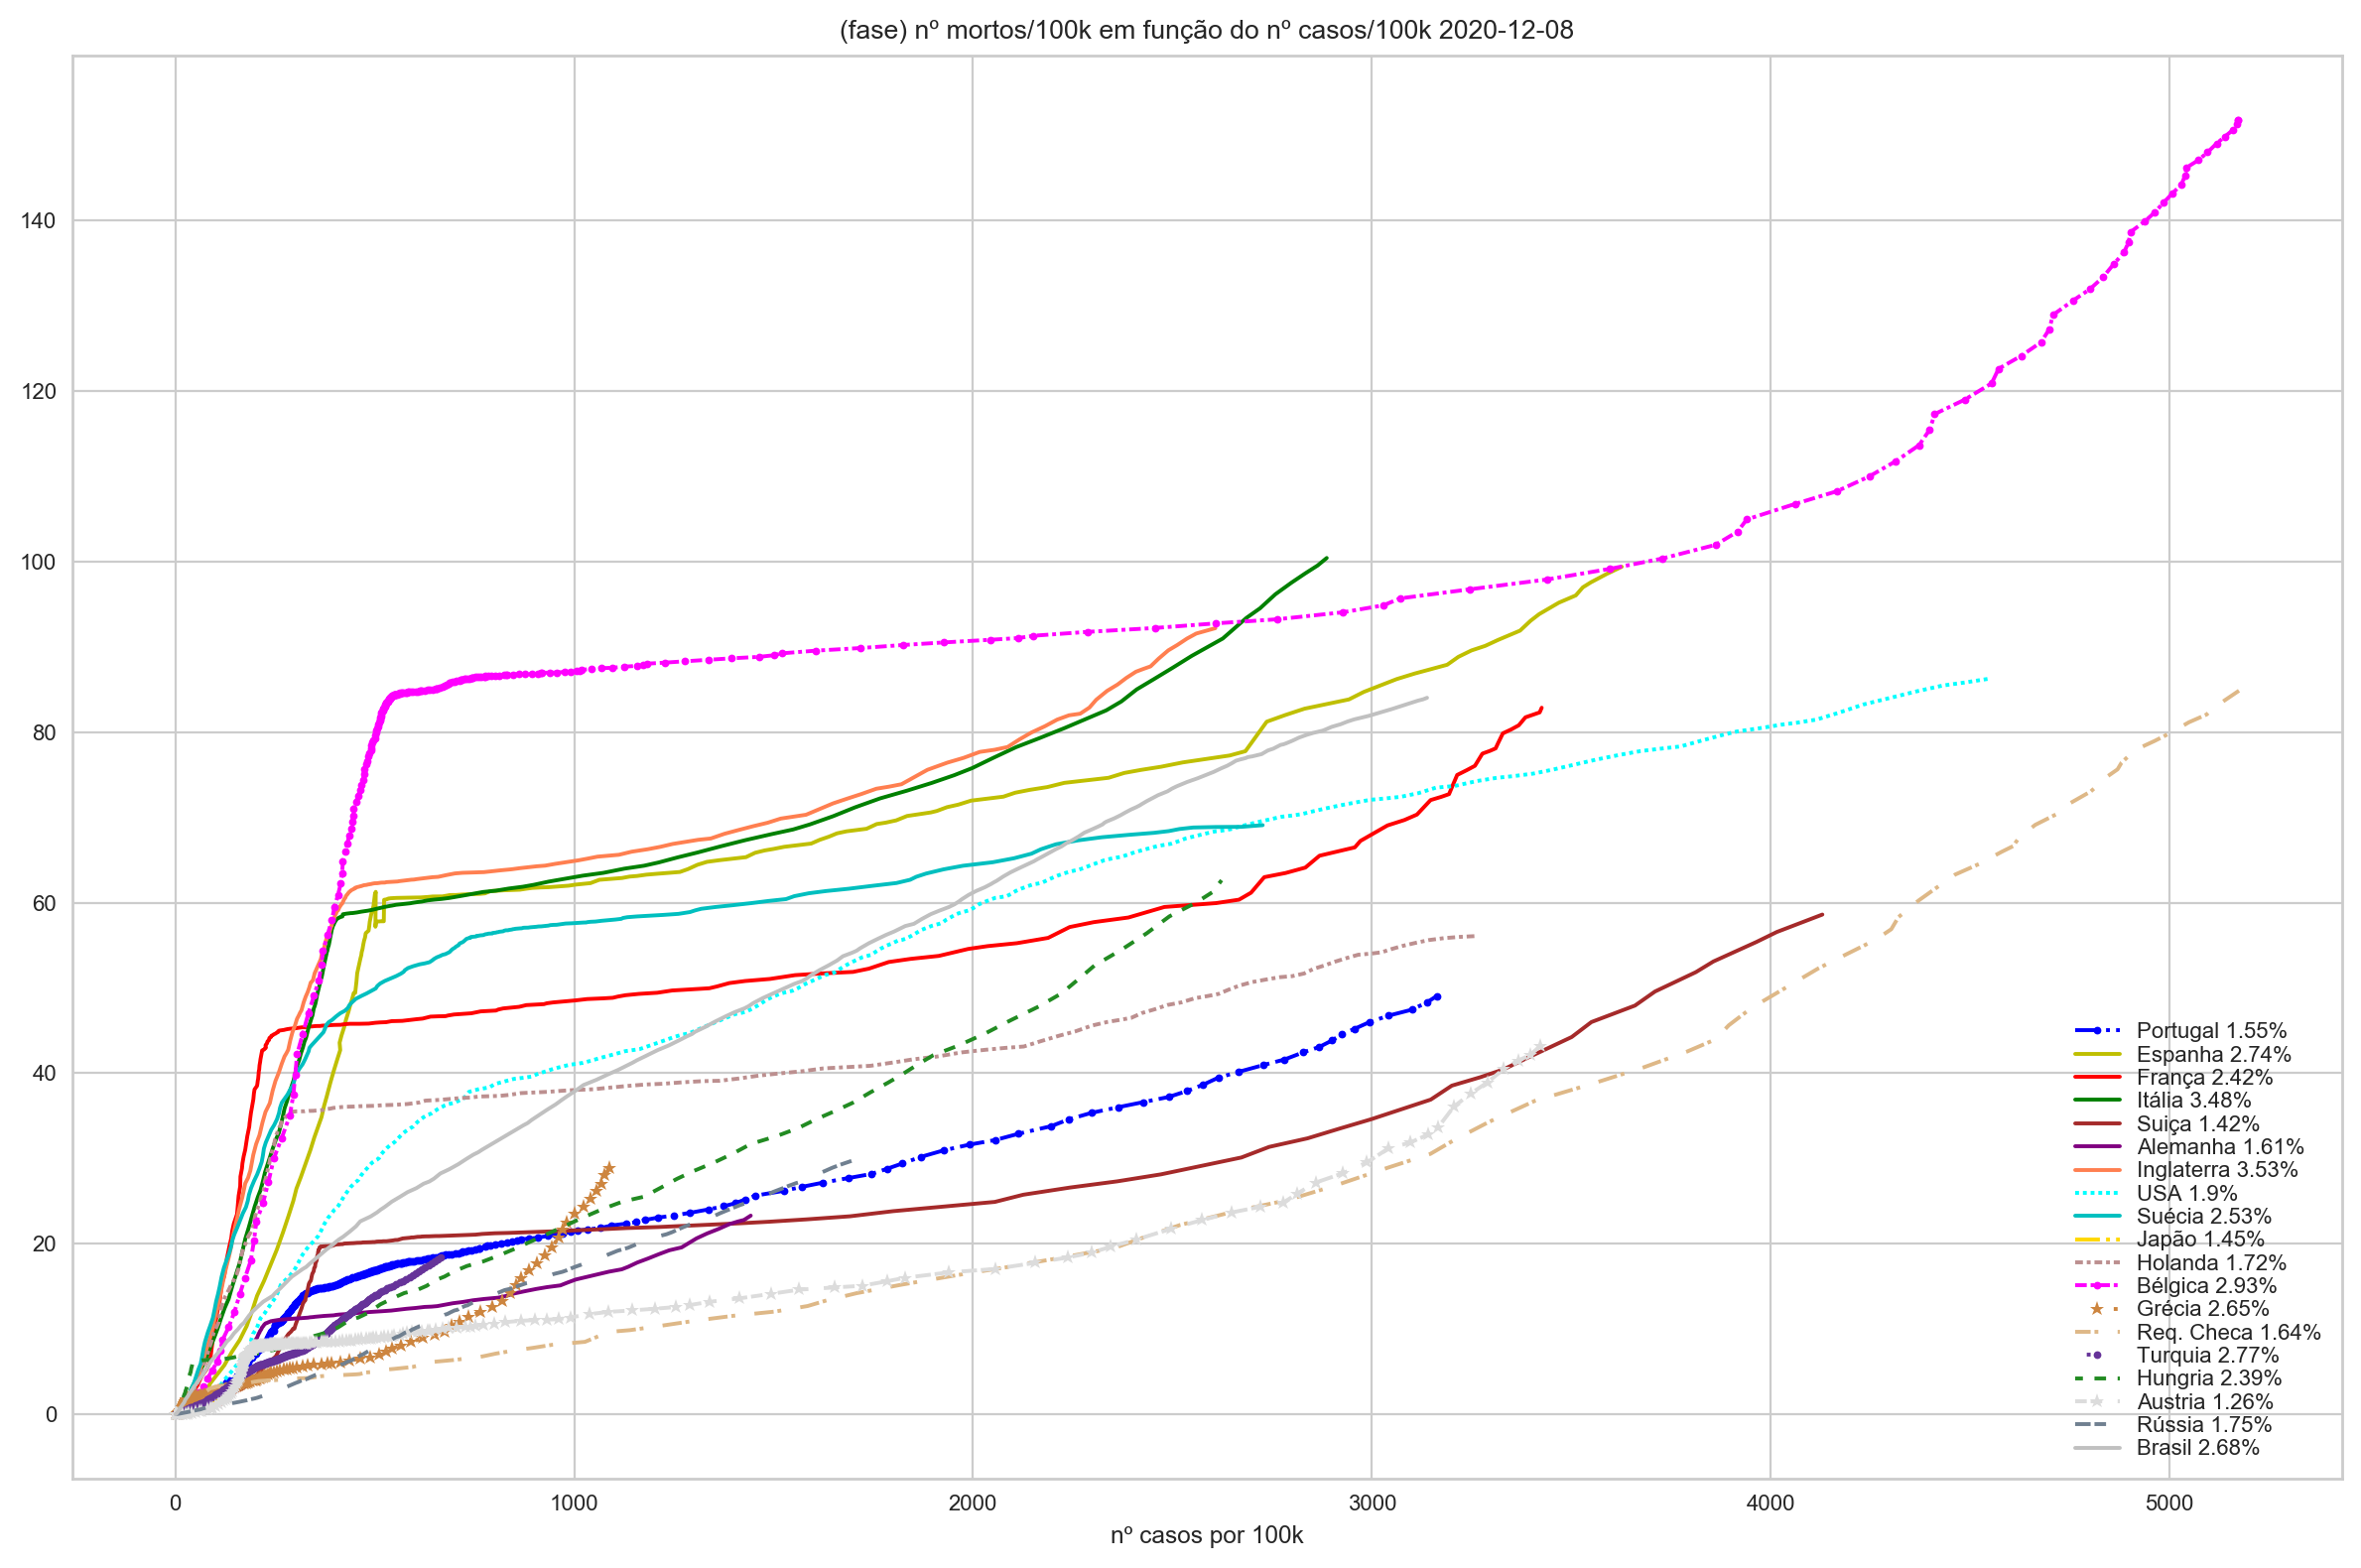

In [54]:
for country in countrieslist0:
    plt.plot(country['cases'].cumsum()/country['pop'],country['deaths'].cumsum()/country['pop'],
        label=country['label']+' '+str(round(country['deaths'].sum()/country['cases'].sum()*100,2))+'%',
             ls=country['ls'],marker=country['markers'],
        color=country['color'])

plt.xlabel("nº casos por 100k")
plt.legend(loc='lower right')
plt.title('(fase) nº mortos/100k em função do nº casos/100k '+str(date.today()))
#plt.savefig('fasemortosporcasos'+str(date.today())+'.png')
#plt.show()

In [55]:
# # %  TOTAL DEATHS PER TOTAL NUMBER OF CASES * 100
print('Taxa de Letalidade: Percentagem de mortos por número de casos\n')
for country in countrieslist:
    print(country['country'],'=',round(country['deaths'].sum()/country['cases'].sum()*100,1),'%')

Taxa de Letalidade: Percentagem de mortos por número de casos

Portugal = 1.6 %
Spain = 2.7 %
France = 2.4 %
Italy = 3.5 %
Switzerland = 1.4 %
Germany = 1.6 %
United_Kingdom = 3.5 %
United_States_of_America = 1.9 %
Sweden = 2.5 %
Japan = 1.5 %
Netherlands = 1.7 %
Belgium = 2.9 %
Greece = 2.6 %
Czechia = 1.6 %
Turkey = 2.8 %
Hungary = 2.4 %
Austria = 1.3 %
Russia = 1.8 %
Brazil = 2.7 %
China = 5.2 %


In [56]:
print('Número mortos por 100k  habitantes\n')
for country in countrieslist:
    print(country['country'],'=',round(country['deaths'].sum()/country['pop'],1))

Número mortos por 100k  habitantes

Portugal = 49.1
Spain = 99.4
France = 82.8
Italy = 100.4
Switzerland = 58.6
Germany = 23.3
United_Kingdom = 92.2
United_States_of_America = 86.2
Sweden = 69.1
Japan = 1.9
Netherlands = 56.1
Belgium = 151.8
Greece = 28.8
Czechia = 84.8
Turkey = 18.4
Hungary = 62.6
Austria = 43.2
Russia = 29.9
Brazil = 84.0
China = 3.4
